## Analysis notebook ##

Interaction of phonological biases and frequency in learning a probabilistic language pattern
Including Korean speakers for analysis
<p>Hanbyul Song & James White
<p>(submission to <i>Cognition</i>)

## Import libraries

In [1]:
import rpy2.rinterface
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%load_ext rpy2.ipython

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


## Read in data and adjust dataframe

In [2]:
# Read in data
df = pd.read_csv('Experiment_result_final_2022.csv')
df.head()

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,StemShouldAlternate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,1.0,26.0,m,affixedtest,1.0,a,0.0,205.0,6034,other_error,error,error,nijaku,melon2,ni,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df = df[(df['Subject'] > 10)].copy()
df.head()
print('Number of participants: ',df['Subject'].nunique())

Number of participants:  325


In [4]:
df

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,StemShouldAlternate
1,11.0,1.0,26.0,m,affixedtest,1.0,a,0.0,205.0,6034,other_error,error,error,nijaku,melon2,ni,yes
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,no
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,ni_nochange,ni,no,bagapi,fork2,ba,no
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,ba_correct,ba,no,baputi,bird2,ba,no
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,ba_correct,ba,no,bagaku,melon2,ba,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,ni_change,ni,yes,bakimu,flower2,ba,no
38993,406.0,13.0,23.0,f,affixedtest,57.0,f,0.0,595.0,2023,ba_correct,ba,no,nibagu,bucket2,ni,no
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,ba_correct,ba,no,nichuta,kitten2,ni,yes
38997,406.0,13.0,23.0,f,affixedtest,59.0,r,0.0,595.0,4523,ba_error,ba,error,nijaku,melon2,ni,yes


In [5]:
len(df)

19500

In [6]:
# Remove participants to be excluded due to inclusion/exclusion criteria
# Most of these (all except 1) were already removed from the csv file, so only 1 more gets removed
# the total should be 324: 99 Korean + 225 English
exclude_list = [21,30,107,110,111,
                37,38,40,43,46,47,48,50,54,58,59,95,97,99,103,
                66,68,69,78,79,82,88,89,93,
                115,116,119,123,129,131,
                168,
                176,181,185,187,193,
                233,248,
                201,214,215,218,220,
                261,262,263,264,266,267,270,272,281,288,289,290,291,
                300,302,319,325,363,384,388,390]
df = df[~df['Subject'].isin(exclude_list)]

# Check that the numbers add up in terms of data and # of participants
print("Number of unique participants remaining: ", len(df['Subject'].unique()))
print("Number of expected participants, based on number of trials: ", len(df)/60)



# Show the unique subjects remaining
df.Subject.unique()

Number of unique participants remaining:  324
Number of expected participants, based on number of trials:  324.0


array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  31.,  32.,  33.,  34.,
        35.,  36.,  39.,  41.,  42.,  44.,  45.,  49.,  51.,  52.,  53.,
        55.,  56.,  57.,  60.,  61.,  62.,  63.,  64.,  65.,  67.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  80.,  81.,  83.,  84.,
        85.,  86.,  87.,  90.,  91.,  92.,  94.,  96.,  98., 100., 101.,
       102., 104., 105., 106., 108., 109., 112., 113., 114., 117., 118.,
       120., 121., 122., 124., 125., 126., 127., 128., 130., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166.,
       167., 169., 170., 171., 172., 173., 174., 175., 177., 178., 179.,
       180., 182., 183., 184., 186., 188., 189., 190., 191., 192., 194.,
       195., 196., 197., 198., 199., 200., 202., 20

In [7]:
print("number of subject in ALL data:", len(df['Subject'].unique()))

number of subject in ALL data: 324


## Participant information

In [8]:
# Check the number of subjects in each group
df.groupby('Group')['Subject'].nunique()

Group
1.0     25
2.0     24
3.0     26
4.0     25
5.0     25
6.0     25
7.0     25
8.0     25
9.0     25
10.0    25
11.0    25
12.0    25
13.0    24
Name: Subject, dtype: int64

In [9]:
### Check that each column has only the expected values
# Age - should be numeric
df.Age.value_counts().sort_values()

54.0      60
56.0      60
58.0      60
47.0      60
45.0      60
46.0      60
44.0      60
37.0      60
57.0      60
59.0      60
49.0      60
39.0     120
32.0     120
35.0     120
38.0     120
43.0     120
33.0     120
31.0     180
29.0     180
30.0     180
27.0     300
28.0     480
26.0     720
18.0     900
19.0    1320
25.0    1440
24.0    1560
21.0    1920
23.0    2160
20.0    3240
22.0    3480
Name: Age, dtype: int64

In [10]:
# Age of particiapnts
print('Mean age: ' + str(np.mean(df.groupby('Subject')['Age'].mean())))
print('Max age: ' + str(df['Age'].max()))
print('Min age: ' + str(df['Age'].min())) # Why is it 5?

Mean age: 23.76851851851852
Max age: 59.0
Min age: 18.0


## Check data from errors

In [11]:
#check that all subjects have 60 trials as expected
df.groupby('Subject')['Phase'].value_counts().sort_values(ascending=False)

Subject  Phase      
406.0    affixedtest    60
166.0    affixedtest    60
148.0    affixedtest    60
149.0    affixedtest    60
150.0    affixedtest    60
                        ..
286.0    affixedtest    60
287.0    affixedtest    60
292.0    affixedtest    60
293.0    affixedtest    60
11.0     affixedtest    60
Name: Phase, Length: 324, dtype: int64

In [12]:
#Check Korean partiicpants are in groups
df.groupby('Group')['Subject'].value_counts()

Group  Subject
1.0    11.0       60
       12.0       60
       13.0       60
       14.0       60
       15.0       60
                  ..
13.0   402.0      60
       403.0      60
       404.0      60
       405.0      60
       406.0      60
Name: Subject, Length: 324, dtype: int64

In [13]:
# Phase, should be only 'affixedtest' for all participants
df.Phase.value_counts().sort_values()

affixedtest    19440
Name: Phase, dtype: int64

In [14]:
# TrialNum, should be 1-60 only
df.TrialNum.value_counts().sort_index()

1.0     324
2.0     324
3.0     324
4.0     324
5.0     324
6.0     324
7.0     324
8.0     324
9.0     324
10.0    324
11.0    324
12.0    324
13.0    324
14.0    324
15.0    324
16.0    324
17.0    324
18.0    324
19.0    324
20.0    324
21.0    324
22.0    324
23.0    324
24.0    324
25.0    324
26.0    324
27.0    324
28.0    324
29.0    324
30.0    324
31.0    324
32.0    324
33.0    324
34.0    324
35.0    324
36.0    324
37.0    324
38.0    324
39.0    324
40.0    324
41.0    324
42.0    324
43.0    324
44.0    324
45.0    324
46.0    324
47.0    324
48.0    324
49.0    324
50.0    324
51.0    324
52.0    324
53.0    324
54.0    324
55.0    324
56.0    324
57.0    324
58.0    324
59.0    324
60.0    324
Name: TrialNum, dtype: int64

In [15]:
# KeyPress, should be from {v, a, r, u, m, j, f, none}
df.KeyPress.value_counts().sort_values()

a        164
v        197
none     351
r        742
u        858
m       1573
j       7151
f       8404
Name: KeyPress, dtype: int64

In [16]:
# Accuracy, should be from {0, 1}
df.Accuracy.value_counts().sort_values()

1.0     8687
0.0    10753
Name: Accuracy, dtype: int64

In [17]:
# RT, should all be numeric or timeout
df[df.RT != 'timeout'].RT.str.isnumeric().value_counts().sort_values()

True    19088
Name: RT, dtype: int64

In [18]:
# Response, should match the counts from KeyPress above
respdf = df.Response.value_counts().sort_values()
print(respdf)

print('\n')
print("Total 'error': ", respdf.iloc[0])
print("Total 'none': ", respdf.iloc[2])
print("Total 'ba': ", respdf.iloc[1]+respdf.iloc[3]+respdf.iloc[-1])
print("Total 'ni': ", respdf.iloc[4]+respdf.iloc[5]+respdf.iloc[6])

other_error     164
ba_change       197
none            351
ba_error        742
ni_error        857
ni_change      1575
ni_nochange    7150
ba_correct     8404
Name: Response, dtype: int64


Total 'error':  164
Total 'none':  351
Total 'ba':  9343
Total 'ni':  9582


In [19]:
# AffixUsed, should be from {ba, ni, error, none}; values should match with above.
df.AffixUsed.value_counts().sort_values()

error     164
none      351
ba       9343
ni       9582
Name: AffixUsed, dtype: int64

In [20]:
# StemAlternation, should be {yes, no, error, na}; na should match none
df.StemAlternation.value_counts().sort_values()

na         351
error     1763
yes       1772
no       15554
Name: StemAlternation, dtype: int64

In [21]:
# Check number of characters in AlienWord. Should be 6 or 7 for all.
df.AlienWord.apply(lambda x: len(x)).sort_values()


1        6
24929    6
24931    6
24933    6
24937    6
        ..
24707    7
24713    7
3539     7
7707     7
20521    7
Name: AlienWord, Length: 19440, dtype: int64

In [22]:
#often there is 'nan' in the alienwords in df... not sure why
df.AlienWord.sort_values().unique()

array(['babagu', 'bachimu', 'badapi', 'bagaku', 'bagapi', 'bajapi',
       'bakimu', 'bakuta', 'bamipa', 'baniba', 'baputi', 'batimu',
       'nibagu', 'nichimu', 'nichuta', 'nidapi', 'nigaku', 'nigapi',
       'nijaku', 'nijapi', 'nikimu', 'nikuta', 'nimipa', 'niniba',
       'niputi', 'nitimu'], dtype=object)

In [23]:
# Picture, should be one of 10 pictures, occurring equally.
df.Picture.value_counts().sort_values()

pillow2        1944
strawberry2    1944
kitten2        1944
egg2           1944
fork2          1944
bucket2        1944
flower2        1944
melon2         1944
bird2          1944
carrot2        1944
Name: Picture, dtype: int64

In [24]:
# Correct Affix, should be from {ba, ni}; values should match proportion breakdown in each group
df.groupby('Group').CorrectAffix.value_counts().sort_index()

Group  CorrectAffix
1.0    ba              1000
       ni               500
2.0    ba               720
       ni               720
3.0    ba               520
       ni              1040
4.0    ba              1000
       ni               500
5.0    ba               750
       ni               750
6.0    ba               500
       ni              1000
7.0    ba               750
       ni               750
8.0    ba              1000
       ni               500
9.0    ba               500
       ni              1000
10.0   ba              1000
       ni               500
11.0   ba               500
       ni              1000
12.0   ba              1000
       ni               500
13.0   ba               480
       ni               960
Name: CorrectAffix, dtype: int64

In [25]:
# Check for null values
df[df.isnull().any(axis=1)]

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,StemShouldAlternate
18207,203.0,7.0,22.0,m,affixedtest,44.0,u,0.0,475.0,4463,ni_error,ni,error,bamipa,pillow2,ba,NaN
19461,216.0,7.0,22.0,f,affixedtest,11.0,u,1.0,275.0,3099,ni_error,ni,error,nibagu,bucket2,ni,NaN
20263,224.0,7.0,19.0,f,affixedtest,52.0,u,1.0,575.0,2590,ni_error,ni,error,niputi,bird2,ni,NaN
20585,227.0,7.0,19.0,m,affixedtest,33.0,u,0.0,315.0,4268,ni_error,ni,error,bajapi,egg2,ba,NaN
22525,244.0,8.0,21.0,f,affixedtest,43.0,none,0.0,480.0,timeout,none,none,na,bachimu,carrot2,ba,NaN
24719,271.0,9.0,22.0,f,affixedtest,60.0,r,0.0,530.0,NaN,ba_error,ba,error,nibagu,bucket2,ni,na
26783,295.0,9.0,21.0,f,affixedtest,12.0,u,1.0,295.0,4119,ni_error,ni,error,nijaku,melon2,ni,NaN


In [26]:
# Remove data where a null or timeout (no response in time period) was recorded
df = df[df.notnull().all(axis=1)]

# Remove 'timeouts' (no response given within the allowed timeframe)
df = df[df['RT']!='timeout']

# Remove errors (cases of incorrect stems or stem changes other than palatalization)
df = df[df['StemAlternation'] != 'error']

In [27]:
df

,Subject,Group,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,Response,AffixUsed,StemAlternation,AlienWord,Picture,CorrectAffix,StemShouldAlternate
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,ba_correct,ba,no,bakuta,kitten2,ba,no
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,ni_nochange,ni,no,bagapi,fork2,ba,no
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,ba_correct,ba,no,baputi,bird2,ba,no
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,ba_correct,ba,no,bagaku,melon2,ba,no
11,11.0,1.0,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,ba_correct,ba,no,niniba,strawberry2,ni,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,406.0,13.0,23.0,f,affixedtest,55.0,j,1.0,590.0,1543,ni_nochange,ni,no,niniba,strawberry2,ni,no
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,ni_change,ni,yes,bakimu,flower2,ba,no
38993,406.0,13.0,23.0,f,affixedtest,57.0,f,0.0,595.0,2023,ba_correct,ba,no,nibagu,bucket2,ni,no
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,ba_correct,ba,no,nichuta,kitten2,ni,yes


## Add columns to df

In [28]:
df.rename(columns={'Group':'GroupNum'}, inplace=True)

In [29]:
# Add column for whether ni- was used
df['UsedNi'] = df['AffixUsed'].apply(lambda x: 1 if x=='ni' else 0)

In [30]:
# Add column for group name based on group number
group_nums = [
    df.GroupNum==1,
    df.GroupNum==2,
    df.GroupNum==3,
    df.GroupNum==4,
    df.GroupNum==5,
    df.GroupNum==6,
    df.GroupNum==7,
    df.GroupNum==8,
    df.GroupNum==9,
    df.GroupNum==10,
    df.GroupNum==11,
    df.GroupNum==12,
    df.GroupNum==13
]

group_names = ['freqba_nonneut',
               '5050_nonneut',
               'freqni_nonneut',
               'freqba_no_alt',
               '5050_no_alt',
               'freqni_no_alt',
               '5050_neut',
               'freqba_neut',
               'freqni_neut',
               'K_freqba_nonneut',
               'K_freqni_nonneut',
               'K_freqba_neut',
               'K_freqni_neut'
]

df['Group'] = np.select(group_nums, group_names)

In [31]:
# Check number of participants in each group
df.groupby('Group')['Subject'].nunique()

Group
5050_neut           25
5050_no_alt         25
5050_nonneut        24
K_freqba_neut       25
K_freqba_nonneut    25
K_freqni_neut       24
K_freqni_nonneut    25
freqba_neut         25
freqba_no_alt       25
freqba_nonneut      25
freqni_neut         25
freqni_no_alt       25
freqni_nonneut      26
Name: Subject, dtype: int64

In [32]:
# Add column for which Alternation Type condition they were in based on group
groups = [
    df.Group.isin(['freqba_no_alt','5050_no_alt','freqni_no_alt']),
    df.Group.isin(['freqba_nonneut','5050_nonneut','freqni_nonneut',
                   'K_freqba_nonneut','K_freqni_nonneut']),
    df.Group.isin(['freqba_neut','5050_neut','freqni_neut',
                   'K_freqba_neut','K_freqni_neut',])
]
conditions = ['no_alt',
              'non_neut',
              'neut'
]

df['AltType'] = np.select(groups, conditions)


# Add column for which Prefix Frequency condition they were in based on group
groups = [
    df.Group.isin(['5050_no_alt','5050_nonneut','5050_neut']),
    df.Group.isin(['freqba_no_alt','freqba_nonneut','freqba_neut',
                   'K_freqba_nonneut','K_freqba_neut']),
    df.Group.isin(['freqni_no_alt','freqni_nonneut','freqni_neut',
                   'K_freqni_nonneut','K_freqni_neut'])
]
conditions = ['5050',
              'freqba',
              'freqni'
]

df['PrefixFreq'] = np.select(groups, conditions)

In [33]:
# Add columns for stem and for initial stem C
pics = [
    df.Picture=='kitten2',
    df.Picture=='melon2',
    df.Picture=='flower2',
    df.Picture=='fork2',
    df.Picture=='bird2',
    df.Picture=='strawberry2',
    df.Picture=='pillow2',
    df.Picture=='carrot2',
    df.Picture=='bucket2',
    df.Picture=='egg2'
]

stems = ['kuta',
         'gaku',
         'kimu',
         'gapi',
         'puti',
         'niba',
         'mipa',
         'timu',
         'bagu',
         'dapi'
]

initialCs = ['k',
          'g',
          'k',
          'g',
          'p',
          'n',
          'm',
          't',
          'b',
          'd'
]

df['Stem'] = np.select(pics,stems)
df['InitialStemC'] = np.select(pics,initialCs)

In [34]:
# Add column for what the frequent prefix was (arbitrarily ba- in 50-50 group)
df['FreqPrefix'] = df['Group'].isin(['freqni_nonneut','freqni_no_alt','freqni_neut','K_freqni_nonneut','K_freqni_neut']).apply(lambda x: 'ni' if x == True else 'ba')

# Add column for whether the response is the frequent variant
df['UsedFreq'] = (df['AffixUsed']==df['FreqPrefix']).astype(int)

# Add column for whether they palatalized the stem in their response
df['AppliedPalatalization'] = df['KeyPress'].apply(lambda x: 1 if (x=='v' or x=='m') else 0)

In [35]:
# Change 'timu' and 'dapi' to 'chimu' and 'japi' in the neut groups (as well as initial stem C)
df['Stem'] = df.apply(lambda x: 'chimu' if (x['AltType']=='neut' and x['Stem']=='timu') else x['Stem'], axis=1)
df['Stem'] = df.apply(lambda x: 'japi' if (x['AltType']=='neut' and x['Stem']=='dapi') else x['Stem'], axis=1)
df['InitialStemC'] = df.apply(lambda x: 'ch' if (x['AltType']=='neut' and x['InitialStemC']=='t') else x['InitialStemC'], axis=1)
df['InitialStemC'] = df.apply(lambda x: 'j' if (x['AltType']=='neut' and x['InitialStemC']=='d') else x['InitialStemC'], axis=1)

In [36]:
a=df[(df['AltType'] == 'neut')].copy()

In [37]:
a['Stem'].unique()

array(['chimu', 'puti', 'kimu', 'gapi', 'mipa', 'japi', 'niba', 'kuta',
       'bagu', 'gaku'], dtype=object)

In [38]:
# Add column for whether ni- was used
df['Homophony'] = df['Stem'].apply(lambda x: 1 if (x=='kimu' or x=='gapi') else 0)


In [39]:
#Add column for whether the initial C is velar
df['VelarStem'] = df['InitialStemC'].apply(lambda x:1 if (x=='k'or x=='g') else 0)

In [40]:
df['HomSet']=df['Stem'].apply(lambda x:1 if (x=='chimu' or x=='japi' or x=='kimu' or x=='gapi') else 0)

In [41]:
# Add colum for whether is is Korean data or English data

df['Language']=df['Group'].isin(['K_freqba_nonneut',
                                 'K_freqni_nonneut',
                                 'K_freqba_neut',
                                 'K_freqni_neut']).apply(lambda x: 'Kor' if x==True else 'Eng')

In [42]:
# Add column for whether ni- was used
df['Homophony'] = df['Stem'].apply(lambda x: 1 if (x=='kimu' or x=='gapi') else 0)

In [43]:
df

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,freqba,kuta,k,ba,1,0,0,1,0,Eng
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,freqba,gapi,g,ba,0,0,1,1,1,Eng
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,...,freqba,puti,p,ba,1,0,0,0,0,Eng
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,freqba,gaku,g,ba,1,0,0,1,0,Eng
11,11.0,1.0,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,...,freqba,niba,n,ba,1,0,0,0,0,Eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,406.0,13.0,23.0,f,affixedtest,55.0,j,1.0,590.0,1543,...,freqni,niba,n,ni,1,0,0,0,0,Kor
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,...,freqni,kimu,k,ni,1,1,1,1,1,Kor
38993,406.0,13.0,23.0,f,affixedtest,57.0,f,0.0,595.0,2023,...,freqni,bagu,b,ni,0,0,0,0,0,Kor
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,...,freqni,kuta,k,ni,0,0,0,1,0,Kor


## Subset for Korean Participants

In [44]:
#Making the subset for Korean participants
dfk=df[(df['Subject']>300) & (df['Subject']<407)].copy()
print('number of subject in Korean data:', len(dfk['Subject'].unique()))

number of subject in Korean data: 99


In [45]:
#should be only 'Freqba and Freqni'
dfk['PrefixFreq'].unique()

array(['freqba', 'freqni'], dtype=object)

In [46]:
#should be only 'non_neut' and 'neut'
dfk['AltType'].unique()

array(['non_neut', 'neut'], dtype=object)

In [47]:
# Add colum for whether is is Korean data or English data

dfk['Language']=dfk['Group'].isin(['K_freqba_nonneut',
                                 'K_freqni_nonneut',
                                 'K_freqba_neut',
                                 'K_freqni_neut']).apply(lambda x: 'Kor' if x==True else 'Eng')

In [48]:
# Number of sex for breakdown
dfk.groupby('Gender')['Subject'].nunique()

Gender
f    65
m    34
Name: Subject, dtype: int64

In [49]:
# Age of particiapnts
print('Mean age: ' + str(np.mean(dfk.groupby('Subject')['Age'].mean())))
print('Max age: ' + str(dfk['Age'].max()))
print('Min age: ' + str(dfk['Age'].min())) # Why is it 5?

Mean age: 23.535353535353536
Max age: 59.0
Min age: 20.0


In [50]:
dfk

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
27121,301.0,10.0,22.0,f,affixedtest,1.0,j,0.0,215.0,3644,...,freqba,puti,p,ba,0,0,0,0,0,Kor
27125,301.0,10.0,22.0,f,affixedtest,3.0,f,1.0,225.0,3834,...,freqba,kimu,k,ba,1,0,1,1,1,Kor
27127,301.0,10.0,22.0,f,affixedtest,4.0,f,0.0,225.0,7121,...,freqba,kuta,k,ba,1,0,0,1,0,Kor
27131,301.0,10.0,22.0,f,affixedtest,6.0,f,0.0,230.0,6232,...,freqba,timu,t,ba,1,0,0,0,0,Kor
27139,301.0,10.0,22.0,f,affixedtest,10.0,f,0.0,235.0,3876,...,freqba,niba,n,ba,1,0,0,0,0,Kor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,406.0,13.0,23.0,f,affixedtest,55.0,j,1.0,590.0,1543,...,freqni,niba,n,ni,1,0,0,0,0,Kor
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,...,freqni,kimu,k,ni,1,1,1,1,1,Kor
38993,406.0,13.0,23.0,f,affixedtest,57.0,f,0.0,595.0,2023,...,freqni,bagu,b,ni,0,0,0,0,0,Kor
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,...,freqni,kuta,k,ni,0,0,0,1,0,Kor


## Subset for English Participants

In [51]:
dfe=df[(df['Subject']>10) & (df['Subject']<298) & (df['Language'] == 'Eng')].copy()
print('number of subject in English data:', len(dfe['Subject'].unique()))

number of subject in English data: 225


In [52]:
#should be 5050, Freqba, and Ferqni
dfe['PrefixFreq'].unique()

array(['freqba', '5050', 'freqni'], dtype=object)

In [53]:
#should be noalt, nonneut, and neut
dfe['AltType'].unique()

array(['non_neut', 'no_alt', 'neut'], dtype=object)

In [54]:
# Number of sex for breakdown
dfe.groupby('Gender')['Subject'].nunique()

Gender
f    162
m     63
Name: Subject, dtype: int64

In [55]:
# Age of particiapnts
print('Mean age: ' + str(np.mean(dfe.groupby('Subject')['Age'].mean())))
print('Max age: ' + str(dfe['Age'].max()))
print('Min age: ' + str(dfe['Age'].min())) # Why is it 5?

Mean age: 23.871111111111112
Max age: 58.0
Min age: 18.0


## Subset for Korean + English speakers data
only include Prefix Frequency (Frequent ba- and Frequent ni), Alternation Type (Non-Neut and Neut)

In [56]:
dfEK=df[(df['AltType'] != 'no_alt') & (df['PrefixFreq'] != '5050')].copy()
print('number of subject in Korean + English data:', len(dfEK['Subject'].unique()))

number of subject in Korean + English data: 200


In [57]:
#check there is no 50-50
dfEK['PrefixFreq'].unique()

array(['freqba', 'freqni'], dtype=object)

In [58]:
#check thre is no No ALt
dfEK['AltType'].unique()

array(['non_neut', 'neut'], dtype=object)

In [59]:
#check the number of subject (should be 200 ( 99Korean + 101 English))
dfEK['Subject'].nunique()

200

In [60]:
#check if Language is both English and Korean
dfEK['Language'].unique()

array(['Eng', 'Kor'], dtype=object)

In [61]:
dfEK

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,freqba,kuta,k,ba,1,0,0,1,0,Eng
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,freqba,gapi,g,ba,0,0,1,1,1,Eng
7,11.0,1.0,26.0,m,affixedtest,4.0,f,1.0,230.0,3329,...,freqba,puti,p,ba,1,0,0,0,0,Eng
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,freqba,gaku,g,ba,1,0,0,1,0,Eng
11,11.0,1.0,26.0,m,affixedtest,6.0,f,0.0,245.0,5699,...,freqba,niba,n,ba,1,0,0,0,0,Eng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38989,406.0,13.0,23.0,f,affixedtest,55.0,j,1.0,590.0,1543,...,freqni,niba,n,ni,1,0,0,0,0,Kor
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,...,freqni,kimu,k,ni,1,1,1,1,1,Kor
38993,406.0,13.0,23.0,f,affixedtest,57.0,f,0.0,595.0,2023,...,freqni,bagu,b,ni,0,0,0,0,0,Kor
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,...,freqni,kuta,k,ni,0,0,0,1,0,Kor


# Analysis

In [62]:
# Set seaborn parameters
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.2)
sns.set_theme(style="ticks", color_codes=True)

In [63]:
### Set general plotting parameters

# General
prefixfreq_order = ['freqba', 'freqni']
prefixfreq_xticks = ['Frequent\nba-', 'Frequent\nni-']
titlesize = 17
xtick_fontsize = 16
ylabsize = 16

# For box plots
box_palette = 'GnBu'
dashed_lw = 1.5
dashes_style=(3,3)

# For swarm plots
point_lw = 1.5
point_size = 7
point_color = 'lightblue'


In [64]:
# Add column for whether ni- was used
dfk['UsedNi'] = dfk['AffixUsed'].apply(lambda x: 1 if x=='ni' else 0)

## Prefix form selection

In [65]:
# KOREAN:Get mean proportion in which participants chose the frequent prefix option, by group
dfk.groupby('Group')['UsedFreq'].mean()

Group
K_freqba_neut       0.673631
K_freqba_nonneut    0.648318
K_freqni_neut       0.699850
K_freqni_nonneut    0.696804
Name: UsedFreq, dtype: float64

In [66]:
# Korean+EnglishGet mean proportion in which participants chose the frequent prefix option, by group
dfEK.groupby('Group')['UsedFreq'].mean()

Group
K_freqba_neut       0.673631
K_freqba_nonneut    0.648318
K_freqni_neut       0.699850
K_freqni_nonneut    0.696804
freqba_neut         0.666181
freqba_nonneut      0.756996
freqni_neut         0.662348
freqni_nonneut      0.664389
Name: UsedFreq, dtype: float64

### Plots

In [67]:
# Aggregate data by subject for plotting
K_usedfreq_by_sub = pd.DataFrame(dfk.groupby(['Subject','Group','AltType','PrefixFreq',])['UsedFreq'].mean())
K_usedfreq_by_sub.reset_index(inplace=True)
K_usedfreq_by_sub.head()

,Subject,Group,AltType,PrefixFreq,UsedFreq
0,301.0,K_freqba_nonneut,non_neut,freqba,0.656250
1,303.0,K_freqba_nonneut,non_neut,freqba,0.660377
2,304.0,K_freqba_nonneut,non_neut,freqba,0.683333
3,305.0,K_freqba_nonneut,non_neut,freqba,0.581818
4,306.0,K_freqba_nonneut,non_neut,freqba,0.957447


In [68]:
K_usedfreq_by_sub.groupby('Group')['UsedFreq'].median()

Group
K_freqba_neut       0.654545
K_freqba_nonneut    0.648649
K_freqni_neut       0.700801
K_freqni_nonneut    0.723404
Name: UsedFreq, dtype: float64

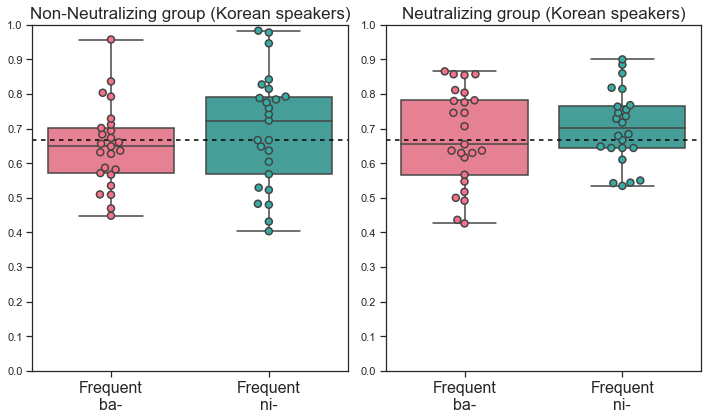

In [69]:
#### KOREAN: Boxplot with swarm plots overlaid

## Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

## Set figure data

# ax1 - non-neutralizing
sns.swarmplot(x='PrefixFreq',y='UsedFreq',
            data = K_usedfreq_by_sub[K_usedfreq_by_sub.AltType=='non_neut'],
            order = prefixfreq_order,
            linewidth=point_lw,size=point_size,
            palette= "husl",  
            ax=ax1)

sns.boxplot(x='PrefixFreq',y='UsedFreq',
            data=K_usedfreq_by_sub[K_usedfreq_by_sub.AltType=='non_neut'],
            order = prefixfreq_order,
            palette="husl", whis=np.inf, ax=ax1)

# ax2 - neutralizing
sns.swarmplot(x='PrefixFreq',y='UsedFreq',
            data = K_usedfreq_by_sub[K_usedfreq_by_sub.AltType=='neut'],
            order = prefixfreq_order,
            linewidth=point_lw,size=point_size,
            palette= "husl",  
            ax=ax2)

sns.boxplot(x='PrefixFreq',y='UsedFreq',
            data=K_usedfreq_by_sub[K_usedfreq_by_sub.AltType=='neut'],
            order = prefixfreq_order,
            palette= "husl", whis=np.inf, ax=ax2)

# Set figure parameters

sns.set_style( {'font.family':'Verdana'})

ax1.set_title('Non-Neutralizing group (Korean speakers)', fontsize=titlesize)
ax1.set_xlabel('', fontsize=19)
ax1.set_ylabel('')
ax1.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])

ax1.yaxis.set_major_locator(ticker.LinearLocator(11))

ax2.set_title('Neutralizing group (Korean speakers)', fontsize=titlesize)
ax2.set_xlabel('',fontsize=19)
ax2.set_ylabel(''),
ax2.set_xticklabels(prefixfreq_xticks,fontsize=xtick_fontsize)
ax2.set_ylim([0,1])

ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

# Add dashed lines showing input frequency
ax1.axhline(0.667,0,1,color='black',linestyle='--', lw=dashed_lw, dashes=dashes_style)


ax2.axhline(0.667,0,1,color='black',linestyle='--', lw=dashed_lw, dashes=dashes_style)



# Make the spacing nice
plt.tight_layout()

In [70]:
# Aggregate data by subject for plotting
EK_usedfreq_by_sub = pd.DataFrame(dfEK.groupby(['Subject','Group','AltType','PrefixFreq','Language'])['UsedFreq'].mean())
EK_usedfreq_by_sub.reset_index(inplace=True)
EK_usedfreq_by_sub.head()

,Subject,Group,AltType,PrefixFreq,Language,UsedFreq
0,11.0,freqba_nonneut,non_neut,freqba,Eng,0.903846
1,12.0,freqba_nonneut,non_neut,freqba,Eng,0.560976
2,13.0,freqba_nonneut,non_neut,freqba,Eng,0.765957
3,14.0,freqba_nonneut,non_neut,freqba,Eng,0.641509
4,15.0,freqba_nonneut,non_neut,freqba,Eng,0.660377


In [71]:
EK_usedfreq_by_sub['Group'].unique()

array(['freqba_nonneut', 'freqni_nonneut', 'freqba_neut', 'freqni_neut',
       'K_freqba_nonneut', 'K_freqni_nonneut', 'K_freqba_neut',
       'K_freqni_neut'], dtype=object)

In [72]:
### Set general plotting parameters

# General
group_order = ['K_freqba_nonneut','freqba_nonneut','K_freqni_nonneut', 'freqni_nonneut']
group_neut_order=['K_freqba_neut','freqba_neut', 'K_freqni_neut','freqni_neut']
group_xticks = ['FreqBa','FreqBa','FreqNi','FreqNi']
titlesize = 17
xtick_fontsize = 15
ylabsize = 16


# For box plots
box_palette = "GnBu"
dashed_lw = 1.5
dashes_style=(3,3)

# For swarm plots

point_lw = 1.5
point_size = 7
point_color = 'lightblue'


sns.set_style( {'font.family':'Verdana'})

In [73]:
# Function to adjust spacing of boxplots
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        
                        

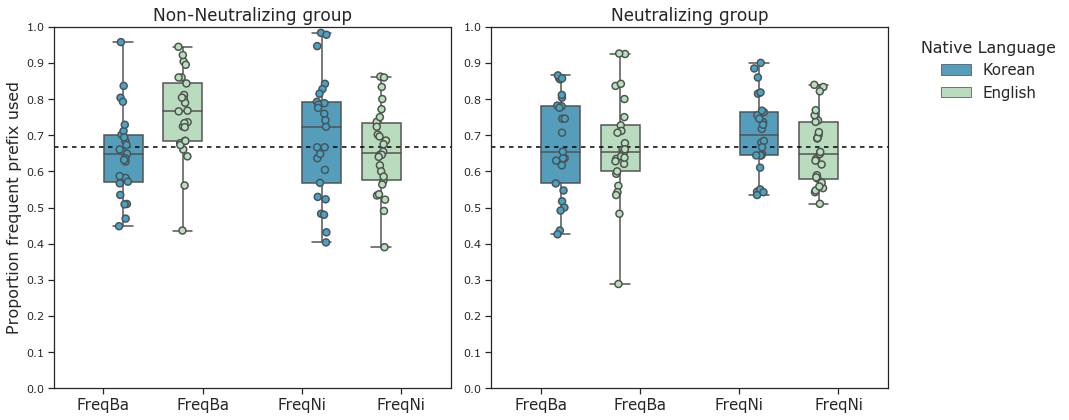

In [74]:
#### Boxplot with swarm plots overlaid

## Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

## Set figure data

# ax1 - non-neutralizing
sns.stripplot(x='Group',y='UsedFreq',hue='Language',
            data = EK_usedfreq_by_sub[EK_usedfreq_by_sub.AltType=='non_neut'],
            order = group_order,
            dodge=True,
            linewidth=point_lw,size=point_size,
            palette=box_palette,  
            ax=ax1)

sns.boxplot(x='Group',y='UsedFreq',hue='Language',
            data = EK_usedfreq_by_sub[EK_usedfreq_by_sub.AltType=='non_neut'],
            order = group_order,
            dodge=True,
            palette=box_palette, whis=np.inf, 
            ax=ax1)




# ax2 - neutralizing
sns.stripplot(x='Group',y='UsedFreq',hue='Language',
            data = EK_usedfreq_by_sub[EK_usedfreq_by_sub.AltType=='neut'],
            order = group_neut_order,
            linewidth=point_lw,size=point_size,
            palette=box_palette, 
            dodge=True,
            ax=ax2)

sns.boxplot(x='Group',y='UsedFreq',hue='Language',
            data = EK_usedfreq_by_sub[EK_usedfreq_by_sub.AltType=='neut'],
            order = group_neut_order,
            dodge=True,
            palette=box_palette, whis=np.inf, ax=ax2)

# Set figure parameters

sns.set_style( {'font.family':'Verdana'})

ax1.set_title('Non-Neutralizing group', fontsize=titlesize)
ax1.set_xlabel('', fontsize=19)
ax1.set_ylabel('Proportion frequent prefix used', fontsize=ylabsize)
ax1.set_xticklabels(group_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator())

ax2.set_title('Neutralizing group', fontsize=titlesize)
ax2.set_xlabel('', fontsize=19)
ax2.set_ylabel('')
ax2.set_xticklabels(group_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])

ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

# Add dashed lines showing input frequency

ax1.axhline(0.667,0,1,color='black',linestyle='--', lw=dashed_lw, dashes=dashes_style)

ax2.axhline(0.667,0,1,color='black',linestyle='--', lw=dashed_lw, dashes=dashes_style)

# Legend

handles, labels = ax2.get_legend_handles_labels()
l = plt.legend(handles=reversed(handles[0:2]), labels=['Korean','English'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Native Language', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()

## Statistics

In [75]:
## Print current dataframe to a csv to be opened with R 
with open('data_for_R.csv','w+') as f: df.to_csv(f, index=False)

In [76]:
%%R
# Load lme4 package
library(lme4)

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)


In [77]:
%%R
# Read data into R and check dataframe
data = read.csv('./data_for_R.csv',header=TRUE)
head(data)

  Subject GroupNum Age Gender       Phase TrialNum KeyPress Accuracy
1      11        1  26      m affixedtest        2        f        1
2      11        1  26      m affixedtest        3        j        0
3      11        1  26      m affixedtest        4        f        1
4      11        1  26      m affixedtest        5        f        1
5      11        1  26      m affixedtest        6        f        0
6      11        1  26      m affixedtest        7        f        1
  CurrentScore   RT    Response AffixUsed StemAlternation AlienWord     Picture
1          215 5000  ba_correct        ba              no    bakuta     kitten2
2          220 7279 ni_nochange        ni              no    bagapi       fork2
3          230 3329  ba_correct        ba              no    baputi       bird2
4          240 5792  ba_correct        ba              no    bagaku      melon2
5          245 5699  ba_correct        ba              no    niniba strawberry2
6          255 4913  ba_correct      

In [78]:
%%R

dataK= subset(data,(data$Language == 'Kor'))


In [79]:
%%R
summary(dataK)

    Subject         GroupNum          Age        Gender           Phase     
 Min.   :301.0   Min.   :10.00   Min.   :20.00   f:3497   affixedtest:5315  
 1st Qu.:329.0   1st Qu.:11.00   1st Qu.:20.00   m:1818                     
 Median :354.0   Median :12.00   Median :23.00                              
 Mean   :354.2   Mean   :11.52   Mean   :23.54                              
 3rd Qu.:380.0   3rd Qu.:13.00   3rd Qu.:24.00                              
 Max.   :406.0   Max.   :13.00   Max.   :59.00                              
                                                                            
    TrialNum     KeyPress    Accuracy       CurrentScore         RT       
 Min.   : 1.00   f:2501   Min.   :0.0000   Min.   :190.0   Min.   : 1044  
 1st Qu.:16.00   j:2131   1st Qu.:0.0000   1st Qu.:320.0   1st Qu.: 2522  
 Median :31.00   m: 610   Median :1.0000   Median :410.0   Median : 3413  
 Mean   :31.05   u:   2   Mean   :0.5031   Mean   :413.2   Mean   : 3818  
 3rd Qu.:

In [80]:
%%R
dataK$AltType = factor(dataK$AltType, levels = c("non_neut","neut"))

In [81]:
##Maximum Random slope:(1+PrefixFreq*AltType|Subject)+(1+PrefixFreq*AltType|Stem)?
#it is likely the (1|Subject)+ (1+PrefixFreq*AltType|Stem) because stem appear across all prefix freq and alt type
#whereas subject appear only one of those condition


In [82]:
%%R
##Full Model for Korean
# N.B. Model fails to converge with by-Stem (1+PrefixFreq*AltType|Stem) random slopes for PrefixFreq
lmer_full = glmer(UsedFreq ~ PrefixFreq*AltType + (1|Subject) + (1+PrefixFreq+AltType|Stem), data=dataK, family=binomial)
summary(lmer_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ PrefixFreq * AltType + (1 | Subject) + (1 + PrefixFreq +  
    AltType | Stem)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6339.3   6411.7  -3158.7   6317.3     5304 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8689 -1.0016  0.5017  0.6761  1.6202 

Random effects:
 Groups  Name             Variance Std.Dev. Corr       
 Subject (Intercept)      0.38946  0.6241              
 Stem    (Intercept)      0.21414  0.4628              
         PrefixFreqfreqni 0.55420  0.7444   -0.88      
         AltTypeneut      0.04851  0.2202   -0.84  0.53
Number of obs: 5315, groups:  Subject, 99; Stem, 12

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                    0.6152     0.1965   3.130  0.00175 **
PrefixFreqfreqni               0.4210     0.2952   1.426  0.15378

In [83]:
%%R
# Try removing interaction effect and compare with full model
lmer2 = glmer(UsedFreq ~ PrefixFreq+AltType + (1|Subject)+ (1+PrefixFreq+AltType|Stem), data=dataK, family=binomial)
summary(lmer2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ PrefixFreq + AltType + (1 | Subject) + (1 + PrefixFreq +  
    AltType | Stem)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6338.6   6404.4  -3159.3   6318.6     5305 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8168 -0.9931  0.5028  0.6762  1.6308 

Random effects:
 Groups  Name             Variance Std.Dev. Corr       
 Subject (Intercept)      0.39461  0.6282              
 Stem    (Intercept)      0.21336  0.4619              
         PrefixFreqfreqni 0.54340  0.7372   -0.88      
         AltTypeneut      0.04933  0.2221   -0.85  0.54
Number of obs: 5315, groups:  Subject, 99; Stem, 12

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       0.69590    0.18369   3.789 0.000152 ***
PrefixFreqfreqni  0.25760    0.25645   1.004 0.315146    
AltTypeneut       0.05077    

In [84]:
%%R
##Interaction is not significant, so further comparison is needed
anova(lmer_full, lmer2)

Data: dataK
Models:
lmer2: UsedFreq ~ PrefixFreq + AltType + (1 | Subject) + (1 + PrefixFreq + 
lmer2:     AltType | Stem)
lmer_full: UsedFreq ~ PrefixFreq * AltType + (1 | Subject) + (1 + PrefixFreq + 
lmer_full:     AltType | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer2     10 6338.6 6404.4 -3159.3   6318.6                         
lmer_full 11 6339.3 6411.7 -3158.7   6317.3 1.2896      1     0.2561


In [85]:
%%R
# Try removing Frequent ni-
lmer3 = glmer(UsedFreq ~ AltType + (1|Subject) + (1+PrefixFreq+AltType|Stem), data=dataK, family=binomial)
anova(lmer2,lmer3)

Data: dataK
Models:
lmer3: UsedFreq ~ AltType + (1 | Subject) + (1 + PrefixFreq + AltType | 
lmer3:     Stem)
lmer2: UsedFreq ~ PrefixFreq + AltType + (1 | Subject) + (1 + PrefixFreq + 
lmer2:     AltType | Stem)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer3  9 6337.6 6396.8 -3159.8   6319.6                         
lmer2 10 6338.6 6404.4 -3159.3   6318.6 0.9872      1     0.3204


In [86]:
%%R
#try removing Neutralizing
lmer4 = glmer(UsedFreq ~ PrefixFreq + (1|Subject) + (1+PrefixFreq+AltType|Stem), data=dataK, family=binomial)
anova(lmer2, lmer4)

Data: dataK
Models:
lmer4: UsedFreq ~ PrefixFreq + (1 | Subject) + (1 + PrefixFreq + AltType | 
lmer4:     Stem)
lmer2: UsedFreq ~ PrefixFreq + AltType + (1 | Subject) + (1 + PrefixFreq + 
lmer2:     AltType | Stem)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer4  9 6336.7 6395.9 -3159.4   6318.7                         
lmer2 10 6338.6 6404.4 -3159.3   6318.6 0.1018      1     0.7496


In [87]:
%%R

##Final Model
lmer5 = glmer(UsedFreq ~ + (1|Subject) + (1+PrefixFreq+AltType|Stem), data=dataK, family=binomial)
anova(lmer3,lmer5)

Data: dataK
Models:
lmer5: UsedFreq ~ +(1 | Subject) + (1 + PrefixFreq + AltType | Stem)
lmer3: UsedFreq ~ AltType + (1 | Subject) + (1 + PrefixFreq + AltType | 
lmer3:     Stem)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer5  8 6335.6 6388.2 -3159.8   6319.6                         
lmer3  9 6337.6 6396.8 -3159.8   6319.6 0.0173      1     0.8953


In [88]:
%%R
anova(lmer4,lmer5)

Data: dataK
Models:
lmer5: UsedFreq ~ +(1 | Subject) + (1 + PrefixFreq + AltType | Stem)
lmer4: UsedFreq ~ PrefixFreq + (1 | Subject) + (1 + PrefixFreq + AltType | 
lmer4:     Stem)
      Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer5  8 6335.6 6388.2 -3159.8   6319.6                         
lmer4  9 6336.7 6395.9 -3159.4   6318.7 0.9027      1     0.3421


In [89]:
%%R
summary(lmer5)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ +(1 | Subject) + (1 + PrefixFreq + AltType | Stem)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6335.6   6388.2  -3159.8   6319.6     5307 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8039 -0.9989  0.5043  0.6763  1.6341 

Random effects:
 Groups  Name             Variance Std.Dev. Corr       
 Subject (Intercept)      0.39573  0.6291              
 Stem    (Intercept)      0.22528  0.4746              
         PrefixFreqfreqni 0.58044  0.7619   -0.89      
         AltTypeneut      0.05024  0.2242   -0.85  0.56
Number of obs: 5315, groups:  Subject, 99; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.84574    0.08218   10.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Summary
The intercept was significantly positive, suggesting that Korean speakers used the frequent variant significantly more frequently in their output.
However, there were no interaction effects of Alternation Type and Prefix Frequency nor fixed effect of Alternation Type or Prefix Frequency.

Korean participants overall used the frequent variant more frequently than the infrequent varint in their output, meaning that they did not avoid using the prefix that triggers non-neutralizing or neutralizing alternations. 


# Statistics comparing Korean to English participants

In [90]:
%%R
dataEK= subset(data,(data$AltType !="no_alt" & data$PrefixFreq !="5050"))


In [91]:
%%R
summary(dataEK)

    Subject         GroupNum           Age        Gender           Phase      
 Min.   : 11.0   Min.   : 1.000   Min.   :18.00   f:7364   affixedtest:10674  
 1st Qu.:114.0   1st Qu.: 3.000   1st Qu.:21.00   m:3310                      
 Median :297.0   Median : 9.000   Median :23.00                               
 Mean   :256.8   Mean   : 8.367   Mean   :24.49                               
 3rd Qu.:353.0   3rd Qu.:12.000   3rd Qu.:25.00                               
 Max.   :406.0   Max.   :13.000   Max.   :59.00                               
                                                                              
    TrialNum     KeyPress    Accuracy       CurrentScore         RT       
 Min.   : 1.00   f:5234   Min.   :0.0000   Min.   :190.0   Min.   :  439  
 1st Qu.:16.00   j:4039   1st Qu.:0.0000   1st Qu.:320.0   1st Qu.: 2641  
 Median :31.00   m:1233   Median :1.0000   Median :405.0   Median : 3526  
 Mean   :30.88   u:   3   Mean   :0.5031   Mean   :411.4   Mean   : 

In [92]:
%%R
# Set baseline to Frequent ni- Non-Neutralizing Korean speakers 
dataEK$AltType = factor(dataEK$AltType)
dataEK$AltType = relevel(dataEK$AltType, "non_neut")

dataEK$PrefixFreq = factor(dataEK$PrefixFreq)
dataEK$PrefixFreq = relevel(dataEK$PrefixFreq,"freqni")

dataEK$Language = factor(dataEK$Language)
dataEK$Language = relevel(dataEK$Language, "Eng")

In [93]:
%%R
with(dataEK, tapply(UsedFreq, list(AltType,PrefixFreq,Language), mean, na.r.=T))

, , Eng

            freqni    freqba
non_neut 0.6643888 0.7569956
neut     0.6623476 0.6661808

, , Kor

            freqni    freqba
non_neut 0.6968044 0.6483180
neut     0.6998503 0.6736311



In [94]:
%%R
#both English and Korean participants
#the maximum random slope ((1+AltType*PrefixFreq*Language|Stem)) failed to converge
EKlmer_full = glmer(UsedFreq ~ AltType*PrefixFreq*Language + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(EKlmer_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ AltType * PrefixFreq * Language + (1 | Subject) +  
    (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12964.5  13037.3  -6472.3  12944.5    10664 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1262 -1.1378  0.5407  0.7046  1.4283 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 0.29778  0.5457  
 Stem    (Intercept) 0.01123  0.1060  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
                                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                               0.709093   0.127057   5.581 2.39e-08
AltTypeneut                              -0.009407   0.175677  -0.054  0.95729
PrefixFreqfreqba                          0.509758   0.177330   2.875  0.00405
LanguageKor                               0.227630   0.1770

In [95]:
%%R
#Remove the interaction effect of AltType*PrefixFreq*Language
EKlmer2=glmer(UsedFreq ~ AltType*PrefixFreq+AltType*Language+PrefixFreq*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
summary(EKlmer2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ AltType * PrefixFreq + AltType * Language + PrefixFreq *  
    Language + (1 | Subject) + (1 + Language | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12965.4  13045.4  -6471.7  12943.4    10663 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0276 -1.1356  0.5398  0.6992  1.3692 

Random effects:
 Groups  Name        Variance Std.Dev. Corr 
 Subject (Intercept) 0.30401  0.5514        
 Stem    (Intercept) 0.01142  0.1069        
         LanguageKor 0.02046  0.1430   -0.36
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   0.78240    0.12089   6.472 9.66e-11 ***
AltTypeneut                  -0.15854    0.15442  -1.027   0.3046    
PrefixFreqfreqba              0.35805    0.15473   2.314 

In [96]:
%%R
##Report n.s. of Neut * Freqbq-* Kor
anova(EKlmer_full, EKlmer2)

Data: dataEK
Models:
EKlmer_full: UsedFreq ~ AltType * PrefixFreq * Language + (1 | Subject) + 
EKlmer_full:     (1 | Stem)
EKlmer2: UsedFreq ~ AltType * PrefixFreq + AltType * Language + PrefixFreq * 
EKlmer2:     Language + (1 | Subject) + (1 + Language | Stem)
            Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
EKlmer_full 10 12964 13037 -6472.3    12944                         
EKlmer2     11 12965 13045 -6471.7    12943 1.1362      1     0.2865


In [97]:
%%R
##Removing the mixed efect of Prefix*Language (Frequent ba- and Kor) Sig*
EKlme3 =glmer(UsedFreq ~ AltType*PrefixFreq+AltType*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer2,EKlme3)

Data: dataEK
Models:
EKlme3: UsedFreq ~ AltType * PrefixFreq + AltType * Language + (1 | Subject) + 
EKlme3:     (1 + Language | Stem)
EKlmer2: UsedFreq ~ AltType * PrefixFreq + AltType * Language + PrefixFreq * 
EKlmer2:     Language + (1 | Subject) + (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
EKlme3  10 12970 13043 -6475.2    12950                            
EKlmer2 11 12965 13045 -6471.7    12943 6.9828      1    0.00823 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [98]:
%%R
#Removing the interaction of AltType*Language (Neut x Kor) n.s.
EKlmer4=glmer(UsedFreq ~ AltType*PrefixFreq+PrefixFreq*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer2,EKlmer4)

Data: dataEK
Models:
EKlmer4: UsedFreq ~ AltType * PrefixFreq + PrefixFreq * Language + (1 | 
EKlmer4:     Subject) + (1 + Language | Stem)
EKlmer2: UsedFreq ~ AltType * PrefixFreq + AltType * Language + PrefixFreq * 
EKlmer2:     Language + (1 | Subject) + (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
EKlmer4 10 12966 13039 -6472.9    12946                         
EKlmer2 11 12965 13045 -6471.7    12943 2.4943      1     0.1143


In [99]:
%%R
#Removing the interaction of AltType*PrefixFreq (Neut x Freq ba) n.s.
#Report anova that intercept of neut *Freqba- is n.s.
EKlmer5=glmer(UsedFreq ~ AltType*Language+PrefixFreq*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer2,EKlmer5)

Data: dataEK
Models:
EKlmer5: UsedFreq ~ AltType * Language + PrefixFreq * Language + (1 | 
EKlmer5:     Subject) + (1 + Language | Stem)
EKlmer2: UsedFreq ~ AltType * PrefixFreq + AltType * Language + PrefixFreq * 
EKlmer2:     Language + (1 | Subject) + (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
EKlmer5 10 12964 13037 -6472.1    12944                         
EKlmer2 11 12965 13045 -6471.7    12943 0.8183      1     0.3657


### Read
This one (EKlmer5) had the least effect on the model's fit (anova result was the highest 0.3657)
lmer_ba_5 = glmer(AppliedPalatalization ~ AltType*Language+PrefixFreq*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))

The next subset model will be removing one factor from this model
"PrefixFreq+Alt x Language" or 
"AltType+PrefixFreq xLanguage"

In [100]:
%%R
#Removing the interaction of Alt*Language
#report Neut *Kor is not significant
EKlmer6=glmer(UsedFreq ~ AltType+PrefixFreq*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer5,EKlmer6)

Data: dataEK
Models:
EKlmer6: UsedFreq ~ AltType + PrefixFreq * Language + (1 | Subject) + 
EKlmer6:     (1 + Language | Stem)
EKlmer5: UsedFreq ~ AltType * Language + PrefixFreq * Language + (1 | 
EKlmer5:     Subject) + (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
EKlmer6  9 12965 13030 -6473.3    12947                        
EKlmer5 10 12964 13037 -6472.1    12944 2.424      1     0.1195


In [101]:
%%R
## Removing the interaction of Prefix * Language
EKlmer7=glmer(UsedFreq ~ AltType*Language+PrefixFreq + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer5,EKlmer7)

Data: dataEK
Models:
EKlmer7: UsedFreq ~ AltType * Language + PrefixFreq + (1 | Subject) + 
EKlmer7:     (1 + Language | Stem)
EKlmer5: UsedFreq ~ AltType * Language + PrefixFreq * Language + (1 | 
EKlmer5:     Subject) + (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
EKlmer7  9 12969 13035 -6475.6    12951                            
EKlmer5 10 12964 13037 -6472.1    12944 6.9389      1   0.008434 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### READ

EKlmer6 had the least effect on the model. the next model removes one factor from EKlmer6.
AltType+PrefixFrequency+Language 
and remove one at a time
AltType+PrefixFrequency//PrefixFrequency+Language //AltType+Language etc

In [102]:
%%R
#Removing the interaction effect of Prefix*Language
EKlmer8=glmer(UsedFreq ~ AltType+PrefixFreq+Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer6,EKlmer8)

Data: dataEK
Models:
EKlmer8: UsedFreq ~ AltType + PrefixFreq + Language + (1 | Subject) + 
EKlmer8:     (1 + Language | Stem)
EKlmer6: UsedFreq ~ AltType + PrefixFreq * Language + (1 | Subject) + 
EKlmer6:     (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
EKlmer8  8 12969 13028 -6476.7    12953                            
EKlmer6  9 12965 13030 -6473.3    12947 6.7856      1    0.00919 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [103]:
%%R
##Removing the single effect of ALt
#report n.s. of Neut
##Final Model
EKlmer9=glmer(UsedFreq ~ PrefixFreq*Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer6,EKlmer9)

Data: dataEK
Models:
EKlmer9: UsedFreq ~ PrefixFreq * Language + (1 | Subject) + (1 + Language | 
EKlmer9:     Stem)
EKlmer6: UsedFreq ~ AltType + PrefixFreq * Language + (1 | Subject) + 
EKlmer6:     (1 + Language | Stem)
        Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
EKlmer9  8 12964 13022 -6473.9    12948                         
EKlmer6  9 12965 13030 -6473.3    12947 1.1564      1     0.2822


In [104]:
%%R
##Removing the mixed Freq*Lang
#report of Freq ba- * Kor
EKlmer10=glmer(UsedFreq ~ PrefixFreq+Language + (1|Subject) + (1+Language|Stem), data=dataEK, family=binomial)
anova(EKlmer9,EKlmer10)

Data: dataEK
Models:
EKlmer10: UsedFreq ~ PrefixFreq + Language + (1 | Subject) + (1 + Language | 
EKlmer10:     Stem)
EKlmer9: UsedFreq ~ PrefixFreq * Language + (1 | Subject) + (1 + Language | 
EKlmer9:     Stem)
         Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
EKlmer10  7 12968 13019 -6477.3    12954                            
EKlmer9   8 12964 13022 -6473.9    12948 6.7265      1   0.009499 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [105]:
%%R
summary(EKlmer9)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedFreq ~ PrefixFreq * Language + (1 | Subject) + (1 + Language |  
    Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12963.8  13022.0  -6473.9  12947.8    10666 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0929 -1.1390  0.5408  0.6991  1.3505 

Random effects:
 Groups  Name        Variance Std.Dev. Corr 
 Subject (Intercept) 0.31399  0.5604        
 Stem    (Intercept) 0.01094  0.1046        
         LanguageKor 0.02056  0.1434   -0.35
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   0.70432    0.09454   7.450 9.33e-14 ***
PrefixFreqfreqba              0.27340    0.12748   2.145  0.03198 *  
LanguageKor                   0.22317    0.13515   1.651  0.09866 .  
PrefixFreqfreqba:LanguageKor -0

## Summary of Prefix Choiced btw Eng and Kor
The interception was significant (pos), suggesting that English participants used the frequent variant significantly more often than the infrequent one in the Frequent ni- Non-Neutralizing condition. 
The proportion of times that Korean speakers used the frequent variant in their output it the matching condition was not significantly different, indicating that Korean speakers also used the frequent prefix sig more often than the infrequent one. 
There were no other significant fixed effects, indicating that Prefix Frequency, languages, or Alternation type did not have a significant effect. The interaction of Language and Prefix Frequency show that English speakers used the frequent variant significantly more often only when the frequent vbariant was ba- and when the infrequent variant triggers non-neutralizing alternation. 

### Choice of Prefix Velar stems vs. non-velar stems

In [106]:
# Aggregate data by subject for plotting
K_usedfreq_velars_by_sub = pd.DataFrame(dfk.groupby(['Subject','Group','Language','AltType','PrefixFreq','VelarStem'])['UsedFreq'].mean())
K_usedfreq_velars_by_sub.reset_index(inplace=True)
K_usedfreq_velars_by_sub.head()

,Subject,Group,Language,AltType,PrefixFreq,VelarStem,UsedFreq
0,301.0,K_freqba_nonneut,Kor,non_neut,freqba,0,0.450000
1,301.0,K_freqba_nonneut,Kor,non_neut,freqba,1,1.000000
2,303.0,K_freqba_nonneut,Kor,non_neut,freqba,0,0.625000
3,303.0,K_freqba_nonneut,Kor,non_neut,freqba,1,0.714286
4,304.0,K_freqba_nonneut,Kor,non_neut,freqba,0,0.694444


In [107]:
# Means by group and stem type (velar 1 vs. non-velar 0)
pd.pivot_table(dfk, values = ['UsedNi'], index=['AltType','VelarStem'],columns=['PrefixFreq'],aggfunc=np.mean)

UsedNi          
PrefixFreq            freqba    freqni
AltType  VelarStem                    
neut     0          0.346062  0.710269
         1          0.296364  0.683398
non_neut 0          0.386565  0.682171
         1          0.298651  0.719057

In [108]:
%%R
#KOREAN: R model to test whether there is a different rate of ni- use

lmer_with_VelarStem = glmer(UsedNi ~ VelarStem + (1|Subject) + (1|Stem), data=dataK, family=binomial)
summary(lmer_with_VelarStem)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ VelarStem + (1 | Subject) + (1 | Stem)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6433.1   6459.5  -3212.6   6425.1     5311 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9219 -0.7753  0.2788  0.7627  3.2031 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.1952   1.0933  
 Stem    (Intercept) 0.1366   0.3696  
Number of obs: 5315, groups:  Subject, 99; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.1807     0.1761   1.026    0.305
VelarStem    -0.1788     0.2353  -0.760    0.447

Correlation of Fixed Effects:
          (Intr)
VelarStem -0.455


In [109]:
%%R
#Compare without the fixed effect

lmer_without_VelarStem= glmer(UsedNi ~  + (1|Subject) + (1|Stem), data=dataK, family=binomial)
summary(lmer_without_VelarStem)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ +(1 | Subject) + (1 | Stem)
   Data: dataK

     AIC      BIC   logLik deviance df.resid 
  6431.7   6451.4  -3212.9   6425.7     5312 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9442 -0.7736  0.2800  0.7606  3.1905 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.1955   1.0934  
 Stem    (Intercept) 0.1438   0.3792  
Number of obs: 5315, groups:  Subject, 99; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.1199     0.1587   0.755     0.45


In [110]:
%%R
anova(lmer_with_VelarStem, lmer_without_VelarStem)

Data: dataK
Models:
lmer_without_VelarStem: UsedNi ~ +(1 | Subject) + (1 | Stem)
lmer_with_VelarStem: UsedNi ~ VelarStem + (1 | Subject) + (1 | Stem)
                       Df    AIC    BIC  logLik deviance Chisq Chi Df
lmer_without_VelarStem  3 6431.7 6451.4 -3212.9   6425.7             
lmer_with_VelarStem     4 6433.1 6459.5 -3212.6   6425.1 0.564      1
                       Pr(>Chisq)
lmer_without_VelarStem           
lmer_with_VelarStem        0.4527


## Summary
whether the stem starts with a velar consonant or not does not effect the percentage of times that participants choose a prefix ni-

## Choice of prefix Velar stems with English+Korean

In [111]:
# Aggregate data by subject for plotting

EK_usedfreq_velars_by_sub = pd.DataFrame(dfEK.groupby(['Subject','Group','Language','AltType','PrefixFreq','VelarStem'])['UsedFreq'].mean())
EK_usedfreq_velars_by_sub.reset_index(inplace=True)
EK_usedfreq_velars_by_sub.head()

,Subject,Group,Language,AltType,PrefixFreq,VelarStem,UsedFreq
0,11.0,freqba_nonneut,Eng,non_neut,freqba,0,0.900000
1,11.0,freqba_nonneut,Eng,non_neut,freqba,1,0.909091
2,12.0,freqba_nonneut,Eng,non_neut,freqba,0,0.521739
3,12.0,freqba_nonneut,Eng,non_neut,freqba,1,0.611111
4,13.0,freqba_nonneut,Eng,non_neut,freqba,0,0.724138


In [112]:
pd.pivot_table(dfEK, values = ['UsedNi'], index=['AltType','Language','VelarStem'],columns=['PrefixFreq'],aggfunc=np.mean)

UsedNi          
PrefixFreq                     freqba    freqni
AltType  Language VelarStem                    
neut     Eng      0          0.353865  0.697761
                  1          0.303309  0.606299
         Kor      0          0.346062  0.710269
                  1          0.296364  0.683398
non_neut Eng      0          0.237685  0.659091
                  1          0.250916  0.672381
         Kor      0          0.386565  0.682171
                  1          0.298651  0.719057

In [113]:
%%R
# Set baseline to Frequent ni- Non-Neutralizing Korean speakers 


dataEK$Language = factor(dataEK$Language)
dataEK$Language = relevel(dataEK$Language, "Eng")

In [114]:
%%R
## R model to test whether there is a different rate of ni- use and also between English and Korean
# with velar and non-velar stems.
lmer_with_VelarStem = glmer(UsedNi ~ VelarStem*Language + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(lmer_with_VelarStem)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ VelarStem * Language + (1 | Subject) + (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12986.1  13029.7  -6487.0  12974.1    10668 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2855 -0.7726 -0.2890  0.7693  3.4216 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.10925  1.0532  
 Stem    (Intercept) 0.09022  0.3004  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)
(Intercept)           -0.08404    0.15481  -0.543    0.587
VelarStem             -0.13545    0.19454  -0.696    0.486
LanguageKor            0.23991    0.15950   1.504    0.133
VelarStem:LanguageKor -0.02060    0.08847  -0.233    0.816

Correlation of Fixed Effects:
            (Intr) VlrStm LnggKr
VelarStem   -0.429              
La

In [115]:
%%R
# Compare to model without the interaction effect
lmer2= glmer(UsedNi ~ VelarStem+Language + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(lmer2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ VelarStem + Language + (1 | Subject) + (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12984.1  13020.5  -6487.1  12974.1    10669 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2982 -0.7726 -0.2894  0.7707  3.4143 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.10924  1.0532  
 Stem    (Intercept) 0.09022  0.3004  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.07998    0.15378  -0.520    0.603
VelarStem   -0.14572    0.18944  -0.769    0.442
LanguageKor  0.23172    0.15557   1.489    0.136

Correlation of Fixed Effects:
            (Intr) VlrStm
VelarStem   -0.417       
LanguageKor -0.500  0.000


In [116]:
%%R
## report the insig of Velar-initial * Kor
anova(lmer_with_VelarStem, lmer2)

Data: dataEK
Models:
lmer2: UsedNi ~ VelarStem + Language + (1 | Subject) + (1 | Stem)
lmer_with_VelarStem: UsedNi ~ VelarStem * Language + (1 | Subject) + (1 | Stem)
                    Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer2                5 12984 13020 -6487.1    12974                         
lmer_with_VelarStem  6 12986 13030 -6487.0    12974 0.0538      1     0.8165


In [117]:
%%R
#compare to model withouht velar stem
lmer3 = glmer(UsedNi ~ VelarStem + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(lmer3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ VelarStem + (1 | Subject) + (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12984.3  13013.4  -6488.2  12976.3    10670 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2584 -0.7713 -0.2916  0.7678  3.3924 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.12104  1.0588  
 Stem    (Intercept) 0.09029  0.3005  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03463    0.13342   0.260    0.795
VelarStem   -0.14573    0.18954  -0.769    0.442

Correlation of Fixed Effects:
          (Intr)
VelarStem -0.481


In [118]:
%%R
anova(lmer2,lmer3)

Data: dataEK
Models:
lmer3: UsedNi ~ VelarStem + (1 | Subject) + (1 | Stem)
lmer2: UsedNi ~ VelarStem + Language + (1 | Subject) + (1 | Stem)
      Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer3  4 12984 13013 -6488.2    12976                         
lmer2  5 12984 13020 -6487.1    12974 2.2089      1     0.1372


In [119]:
%%R
#compare to model withouht velar

lmer4 = glmer(UsedNi ~ Language + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(lmer4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ Language + (1 | Subject) + (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12982.7  13011.8  -6487.3  12974.7    10670 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3094 -0.7718 -0.2886  0.7692  3.4207 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.10937  1.0533  
 Stem    (Intercept) 0.09503  0.3083  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.1293     0.1412  -0.916    0.360
LanguageKor   0.2317     0.1556   1.490    0.136

Correlation of Fixed Effects:
            (Intr)
LanguageKor -0.545


In [120]:
%%R
#report the insig of Vlear-Initial stem
anova(lmer2,lmer4)

Data: dataEK
Models:
lmer4: UsedNi ~ Language + (1 | Subject) + (1 | Stem)
lmer2: UsedNi ~ VelarStem + Language + (1 | Subject) + (1 | Stem)
      Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer4  4 12983 13012 -6487.3    12975                         
lmer2  5 12984 13020 -6487.1    12974 0.5771      1     0.4475


In [121]:
%%R
#compare to model withouht Language or velar
##Final model
lmer_without_VelarStem = glmer(UsedNi ~ + (1|Subject) + (1|Stem), data=dataEK, family=binomial)
summary(lmer_without_VelarStem)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: UsedNi ~ +(1 | Subject) + (1 | Stem)
   Data: dataEK

     AIC      BIC   logLik deviance df.resid 
 12982.9  13004.7  -6488.5  12976.9    10671 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2695 -0.7717 -0.2907  0.7679  3.3987 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.12119  1.0589  
 Stem    (Intercept) 0.09511  0.3084  
Number of obs: 10674, groups:  Subject, 200; Stem, 12

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.0147     0.1187  -0.124    0.901


In [122]:
%%R
## Report the insig of Korean
anova(lmer4,lmer_without_VelarStem)

Data: dataEK
Models:
lmer_without_VelarStem: UsedNi ~ +(1 | Subject) + (1 | Stem)
lmer4: UsedNi ~ Language + (1 | Subject) + (1 | Stem)
                       Df   AIC   BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_without_VelarStem  3 12983 13005 -6488.5    12977                         
lmer4                   4 12983 13012 -6487.3    12975 2.2086      1     0.1372


## Velarstem summary
Whether the stem was a velar consonant or not did not affect the percentage of times that participants choose a prefix,

## Individual subjects who regularized the frequent prefix (sign tests)

In [123]:
from scipy.stats import binom_test

In [124]:
##KOREAN PARTICIPANTS
## Calculate umber of subjects who individually used the frequent affix more than the input proportion
regularisers = pd.concat(
    [pd.DataFrame(
        (dfk[dfk.PrefixFreq!='5050'].groupby(['Subject','Group']).mean()['UsedFreq']>.6667).groupby('Group').sum().astype(int))
    ]  
)

regularisers = pd.concat([regularisers,
                          pd.DataFrame(dfk.groupby('Group')['Subject'].nunique())],axis=1)

regularisers.columns = ['Number of regularisers','Total subjects']

# Calculate the proportion that regularised in each group
regularisers['Proportion regularisers'] = round(regularisers['Number of regularisers']/regularisers['Total subjects'],2)

# Do a binomial test for each group and add the p-values to the dataframe
binomtest_pvalues = []

for i in range(len(regularisers)):
    p = binom_test(regularisers.iloc[i]['Number of regularisers'],regularisers.iloc[i]['Total subjects'])
    binomtest_pvalues.append(p)

regularisers['Binomial test p-value'] = binomtest_pvalues

# Show results
regularisers


,Number of regularisers,Total subjects,Proportion regularisers,Binomial test p-value
Group,,,,
K_freqba_neut,12,25,0.48,1.000000
K_freqba_nonneut,10,25,0.40,0.424356
K_freqni_neut,14,24,0.58,0.541256
K_freqni_nonneut,13,25,0.52,1.000000


In [125]:
## Calculate umber of subjects who individually used the frequent affix more than the input proportion
regularisers = pd.concat(
    [pd.DataFrame(
        (df[df.PrefixFreq=='5050'].groupby(['Subject','Group']).mean()['UsedFreq']>.5).groupby('Group').sum().astype(int)),
    pd.DataFrame(
        (df[df.PrefixFreq!='5050'].groupby(['Subject','Group']).mean()['UsedFreq']>.6667).groupby('Group').sum().astype(int))
    ]  
)

regularisers = pd.concat([regularisers,
                          pd.DataFrame(df.groupby('Group')['Subject'].nunique())],axis=1)

regularisers.columns = ['Number of regularisers','Total subjects']

# Calculate the proportion that regularised in each group
regularisers['Proportion regularisers'] = round(regularisers['Number of regularisers']/regularisers['Total subjects'],2)

# Do a binomial test for each group and add the p-values to the dataframe
binomtest_pvalues = []

for i in range(len(regularisers)):
    p = binom_test(regularisers.iloc[i]['Number of regularisers'],regularisers.iloc[i]['Total subjects'])
    binomtest_pvalues.append(p)

regularisers['Binomial test p-value'] = binomtest_pvalues

# Show results
regularisers

,Number of regularisers,Total subjects,Proportion regularisers,Binomial test p-value
Group,,,,
5050_neut,9,25,0.36,0.229523
5050_no_alt,12,25,0.48,1.000000
5050_nonneut,12,24,0.50,1.000000
K_freqba_neut,12,25,0.48,1.000000
K_freqba_nonneut,10,25,0.40,0.424356
K_freqni_neut,14,24,0.58,0.541256
K_freqni_nonneut,13,25,0.52,1.000000
freqba_neut,10,25,0.40,0.424356
freqba_no_alt,7,25,0.28,0.043285


# Application of palatalization rule

## Korean Plot

In [126]:
##KOREAN: Only Velar-initial stems are included in the dataset
pal_dfk = dfk[(dfk.VelarStem == 1)].copy()
pal_dfk.head()

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
27125,301.0,10.0,22.0,f,affixedtest,3.0,f,1.0,225.0,3834,...,freqba,kimu,k,ba,1,0,1,1,1,Kor
27127,301.0,10.0,22.0,f,affixedtest,4.0,f,0.0,225.0,7121,...,freqba,kuta,k,ba,1,0,0,1,0,Kor
27145,301.0,10.0,22.0,f,affixedtest,13.0,f,1.0,245.0,5643,...,freqba,kimu,k,ba,1,0,1,1,1,Kor
27149,301.0,10.0,22.0,f,affixedtest,15.0,f,1.0,255.0,4995,...,freqba,kuta,k,ba,1,0,0,1,0,Kor
27171,301.0,10.0,22.0,f,affixedtest,26.0,f,0.0,285.0,6291,...,freqba,gaku,g,ba,1,0,0,1,0,Kor


In [127]:
pd.pivot_table(pal_dfk, values=['AppliedPalatalization'], index=['AltType','Group'], columns=['AffixUsed'])

AppliedPalatalization          
AffixUsed                                    ba        ni
AltType  Group                                           
neut     K_freqba_neut                 0.046512  0.527607
         K_freqni_neut                 0.109756  0.641243
non_neut K_freqba_nonneut              0.021978  0.387097
         K_freqni_nonneut              0.174825  0.647541

In [128]:
# KOREAN:Aggregate data by subject for plotting
K_pal_by_sub = pd.DataFrame(pal_dfk.groupby(['Subject','Group','AltType','PrefixFreq','AffixUsed'])['AppliedPalatalization'].mean())
K_pal_by_sub.reset_index(inplace=True)
K_pal_by_sub.head()

,Subject,Group,AltType,PrefixFreq,AffixUsed,AppliedPalatalization
0,301.0,K_freqba_nonneut,non_neut,freqba,ba,0.000000
1,303.0,K_freqba_nonneut,non_neut,freqba,ba,0.000000
2,303.0,K_freqba_nonneut,non_neut,freqba,ni,0.666667
3,304.0,K_freqba_nonneut,non_neut,freqba,ba,0.000000
4,304.0,K_freqba_nonneut,non_neut,freqba,ni,0.375000


In [129]:
K_pal_by_sub.Subject.nunique()

99

In [130]:
### Set additional plotting parameters

# General
prefixfreq_order = ['freqba', 'freqni']
prefixfreq_xticks = ['Frequent\nba-', 'Frequent\nni-']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'cool'

# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

In [131]:
# Function to adjust spacing of boxplots
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


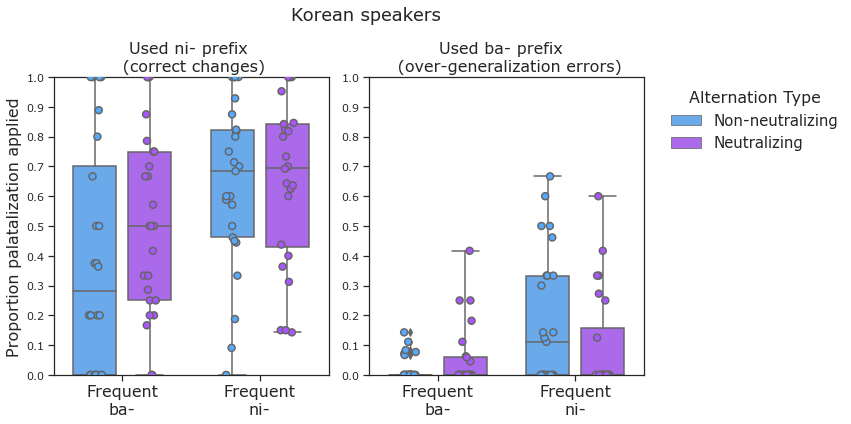

In [132]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
fig.subplots_adjust(top=1.5)
fig.suptitle('Korean speakers', x=0.43, fontsize=18)

# Set figure data

# ax1 - used ni- (correct changes)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=K_pal_by_sub[K_pal_by_sub.AffixUsed=='ni'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=K_pal_by_sub[K_pal_by_sub.AffixUsed=='ni'], 
            order=prefixfreq_order,
            palette=pal_palette, whis=np.inf,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=K_pal_by_sub[K_pal_by_sub.AffixUsed=='ba'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=K_pal_by_sub[K_pal_by_sub.AffixUsed=='ba'], 
            order=prefixfreq_order,
            palette=pal_palette, whis=np.inf, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix  \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax2.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['Non-neutralizing','Neutralizing'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Alternation Type', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


### English speakers Palatalization plot

In [133]:
## ENGLISH: This part only analyzes Non-Neut and Neut groups; only velar-initial stems are included.
## (No-alt excluded because there was no palatalization.)

pal_dfe = dfe[(dfe.AltType!='no_alt') & (dfe.VelarStem == 1) & (dfe.PrefixFreq!='5050')].copy()

pal_dfe.head()

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
3,11.0,1.0,26.0,m,affixedtest,2.0,f,1.0,215.0,5000,...,freqba,kuta,k,ba,1,0,0,1,0,Eng
5,11.0,1.0,26.0,m,affixedtest,3.0,j,0.0,220.0,7279,...,freqba,gapi,g,ba,0,0,1,1,1,Eng
9,11.0,1.0,26.0,m,affixedtest,5.0,f,1.0,240.0,5792,...,freqba,gaku,g,ba,1,0,0,1,0,Eng
19,11.0,1.0,26.0,m,affixedtest,10.0,f,1.0,270.0,8531,...,freqba,kimu,k,ba,1,0,1,1,1,Eng
29,11.0,1.0,26.0,m,affixedtest,15.0,f,1.0,305.0,7519,...,freqba,kuta,k,ba,1,0,0,1,0,Eng


In [134]:
pd.pivot_table(pal_dfe, values=['AppliedPalatalization'], index=['AltType','Group'], columns=['AffixUsed'])

AppliedPalatalization          
AffixUsed                                  ba        ni
AltType  Group                                         
neut     freqba_neut                 0.039578  0.454545
         freqni_neut                 0.245000  0.620130
non_neut freqba_nonneut              0.022005  0.737226
         freqni_nonneut              0.110465  0.713881

In [135]:
dfe['Language'].unique()

array(['Eng'], dtype=object)

In [136]:
# Aggregate data by subject for plotting
E_pal_by_sub = pd.DataFrame(pal_dfe.groupby(['Subject','Group','AltType','PrefixFreq','AffixUsed'])['AppliedPalatalization'].mean())
E_pal_by_sub.reset_index(inplace=True)
E_pal_by_sub.head()

,Subject,Group,AltType,PrefixFreq,AffixUsed,AppliedPalatalization
0,11.0,freqba_nonneut,non_neut,freqba,ba,0.000000
1,11.0,freqba_nonneut,non_neut,freqba,ni,0.500000
2,12.0,freqba_nonneut,non_neut,freqba,ba,0.090909
3,12.0,freqba_nonneut,non_neut,freqba,ni,0.142857
4,13.0,freqba_nonneut,non_neut,freqba,ba,0.066667


In [137]:
E_pal_by_sub.Subject.nunique()

101

### Plots

In [138]:
### Set additional plotting parameters

# General
prefixfreq_order = ['freqba', 'freqni']
prefixfreq_xticks = ['Frequent\nba-', 'Frequent\nni-']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'spring'

# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

In [139]:
# Function to adjust spacing of boxplots
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


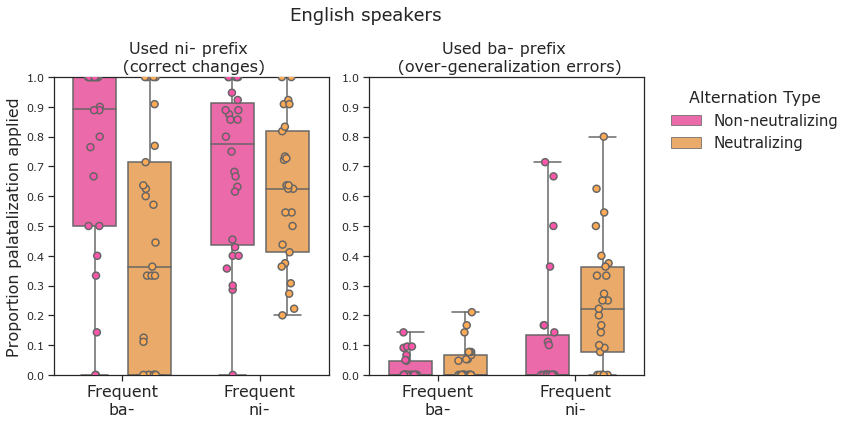

In [140]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
fig.subplots_adjust(top=1.5)
fig.suptitle('English speakers', x=0.43, fontsize=18)
# Set figure data

# ax1 - used ni- (correct changes)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=E_pal_by_sub[E_pal_by_sub.AffixUsed=='ni'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=E_pal_by_sub[E_pal_by_sub.AffixUsed=='ni'], 
            order=prefixfreq_order,
            palette=pal_palette, whis=np.inf,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=E_pal_by_sub[E_pal_by_sub.AffixUsed=='ba'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='AltType',
            data=E_pal_by_sub[E_pal_by_sub.AffixUsed=='ba'], 
            order=prefixfreq_order,
            palette=pal_palette, whis=np.inf, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax2.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['Non-neutralizing','Neutralizing'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Alternation Type', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


### Statistics

In [141]:
%%R
# Make subset: only velar-initial stems, excluding no alternation groups,or 50-50
paldata = subset(data,data$AltType!='no_alt' & data$VelarStem==1 & data$PrefixFreq!='5050')

#Make separate subsets of paldata for ba and ni used
ba_data = subset(paldata,paldata$AffixUsed=='ba')
ni_data = subset(paldata,paldata$AffixUsed=='ni')

### Korean data subset

In [142]:
%%R

paldataK = subset(dataK,dataK$AltType!='no_alt' & dataK$PrefixFreq!='5050' & dataK$VelarStem==1 )

#Make separate subsets of paldata for ba and ni used
ba_dataK = subset(paldataK,paldataK$AffixUsed=='ba')
ni_dataK = subset(paldataK,paldataK$AffixUsed=='ni')

In [143]:
%%R
summary(ni_dataK)

    Subject         GroupNum          Age        Gender          Phase     
 Min.   :303.0   Min.   :10.00   Min.   :20.00   f:685   affixedtest:1038  
 1st Qu.:331.0   1st Qu.:11.00   1st Qu.:20.00   m:353                     
 Median :357.0   Median :11.00   Median :23.00                             
 Mean   :356.9   Mean   :11.69   Mean   :24.09                             
 3rd Qu.:380.0   3rd Qu.:13.00   3rd Qu.:24.00                             
 Max.   :406.0   Max.   :13.00   Max.   :59.00                             
                                                                           
    TrialNum     KeyPress    Accuracy      CurrentScore         RT       
 Min.   : 1.00   f:  0    Min.   :0.000   Min.   :190.0   Min.   : 1178  
 1st Qu.:18.00   j:427    1st Qu.:0.000   1st Qu.:320.0   1st Qu.: 2760  
 Median :31.00   m:609    Median :0.000   Median :405.0   Median : 3776  
 Mean   :31.04   u:  1    Mean   :0.315   Mean   :409.3   Mean   : 4101  
 3rd Qu.:46.00   v:  1

In [144]:
%%R
summary(ba_dataK)

    Subject         GroupNum          Age        Gender          Phase     
 Min.   :301.0   Min.   :10.00   Min.   :20.00   f:691   affixedtest:1058  
 1st Qu.:326.0   1st Qu.:10.00   1st Qu.:20.00   m:367                     
 Median :351.5   Median :12.00   Median :23.00                             
 Mean   :351.2   Mean   :11.33   Mean   :22.92                             
 3rd Qu.:379.0   3rd Qu.:12.00   3rd Qu.:24.00                             
 Max.   :406.0   Max.   :13.00   Max.   :59.00                             
                                                                           
    TrialNum     KeyPress    Accuracy       CurrentScore         RT       
 Min.   : 1.00   f:988    Min.   :0.0000   Min.   :200.0   Min.   : 1185  
 1st Qu.:16.00   j:  0    1st Qu.:0.0000   1st Qu.:320.0   1st Qu.: 3029  
 Median :30.00   m:  0    Median :1.0000   Median :405.0   Median : 4067  
 Mean   :30.54   u:  1    Mean   :0.5142   Mean   :412.6   Mean   : 4394  
 3rd Qu.:46.00   

In [145]:
%%R

with(ni_dataK, tapply(AppliedPalatalization, list(Group), mean, na.r = T))


       5050_neut      5050_no_alt     5050_nonneut    K_freqba_neut 
              NA               NA               NA        0.5276074 
K_freqba_nonneut    K_freqni_neut K_freqni_nonneut      freqba_neut 
       0.3870968        0.6412429        0.6475410               NA 
   freqba_no_alt   freqba_nonneut      freqni_neut    freqni_no_alt 
              NA               NA               NA               NA 
  freqni_nonneut 
              NA 


In [146]:
%%R

with(ba_dataK, tapply(AppliedPalatalization, list(Group), mean, na.r = T))


       5050_neut      5050_no_alt     5050_nonneut    K_freqba_neut 
              NA               NA               NA       0.04651163 
K_freqba_nonneut    K_freqni_neut K_freqni_nonneut      freqba_neut 
      0.02197802       0.10975610       0.17482517               NA 
   freqba_no_alt   freqba_nonneut      freqni_neut    freqni_no_alt 
              NA               NA               NA               NA 
  freqni_nonneut 
              NA 


### Korean: Palatalization when ni- was used (correct application)

In [147]:
%%R
# Set baseline to 50-50 No alternation grouop 

ni_dataK$AltType = factor(ni_dataK$AltType)
ni_dataK$AltType = relevel(ni_dataK$AltType, "neut")

ni_dataK$PrefixFreq = factor(ni_dataK$PrefixFreq)
ni_dataK$PrefixFreq = relevel(ni_dataK$PrefixFreq,"freqni")


In [148]:
%%R
# Set baseline to 50-50 No alternation grouop 

ni_dataK$AltType = factor(ni_dataK$AltType)
ni_dataK$AltType = relevel(ni_dataK$AltType, "non_neut")

ni_dataK$PrefixFreq = factor(ni_dataK$PrefixFreq)
ni_dataK$PrefixFreq = relevel(ni_dataK$PrefixFreq,"freqni")

In [149]:
%%R
## Full model
# N.B. model fails to converge with by-Stem random slopes for PrefixFreq.
lmer_ni_full = glmer(AppliedPalatalization ~ AltType*PrefixFreq + (1|Subject) + (1|Stem), data=ni_dataK, family=binomial)
summary(lmer_ni_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq + (1 | Subject) +  
    (1 | Stem)
   Data: ni_dataK

     AIC      BIC   logLik deviance df.resid 
  1177.2   1206.9   -582.6   1165.2     1032 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3297 -0.6413  0.2472  0.6079  2.3559 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.5342   1.5919  
 Stem    (Intercept) 0.1096   0.3311  
Number of obs: 1038, groups:  Subject, 98; Stem, 4

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                    0.7916     0.3890   2.035  0.04185 * 
AltTypeneut                    0.1514     0.5012   0.302  0.76260   
PrefixFreqfreqba              -1.5861     0.5343  -2.969  0.00299 **
AltTypeneut:PrefixFreqfreqba   0.7170     0.7450   0.962  0.33587   
---
Signif. codes:  0 ‘***’ 0

In [150]:
%%R
# Try removing the interaction. (It is non-sig., so remove.)

lmer_ni_2 = glmer(AppliedPalatalization ~ AltType+PrefixFreq + (1|Subject) + (1|Stem), data=ni_dataK, family=binomial)
anova(lmer_ni_full, lmer_ni_2)

Data: ni_dataK
Models:
lmer_ni_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject) + 
lmer_ni_2:     (1 | Stem)
lmer_ni_full: AppliedPalatalization ~ AltType * PrefixFreq + (1 | Subject) + 
lmer_ni_full:     (1 | Stem)
             Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ni_2     5 1176.2 1200.9 -583.08   1166.2                         
lmer_ni_full  6 1177.2 1206.9 -582.62   1165.2 0.9127      1     0.3394


In [151]:
%%R
#remove the single effect of PrefixFreeq
#sig reamains
lmer_ni_3 = glmer(AppliedPalatalization ~ AltType + (1|Subject) + (1|Stem), data=ni_dataK, family=binomial)
anova(lmer_ni_2,lmer_ni_3)

Data: ni_dataK
Models:
lmer_ni_3: AppliedPalatalization ~ AltType + (1 | Subject) + (1 | Stem)
lmer_ni_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject) + 
lmer_ni_2:     (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
lmer_ni_3  4 1184.3 1204.1 -588.17   1176.3                            
lmer_ni_2  5 1176.2 1200.9 -583.08   1166.2 10.175      1   0.001423 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [152]:
%%R
## Try removing AltType.FINAL model
## not sig, can be removed
lmer_ni_4 = glmer(AppliedPalatalization ~ PrefixFreq + (1|Subject) + (1|Stem), data=ni_dataK, family=binomial)
anova(lmer_ni_2, lmer_ni_4)

Data: ni_dataK
Models:
lmer_ni_4: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
lmer_ni_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject) + 
lmer_ni_2:     (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ni_4  4 1175.8 1195.5 -583.88   1167.8                         
lmer_ni_2  5 1176.2 1200.9 -583.08   1166.2 1.6055      1     0.2051


In [153]:
%%R
lmer_ni_5 = glmer(AppliedPalatalization ~ + (1|Subject) + (1|Stem), data=ni_dataK, family=binomial)
anova(lmer_ni_4, lmer_ni_5)

Data: ni_dataK
Models:
lmer_ni_5: AppliedPalatalization ~ +(1 | Subject) + (1 | Stem)
lmer_ni_4: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
lmer_ni_5  3 1183.6 1198.5 -588.81   1177.6                            
lmer_ni_4  4 1175.8 1195.5 -583.88   1167.8 9.8503      1   0.001698 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [154]:
%%R
summary(lmer_ni_4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
   Data: ni_dataK

     AIC      BIC   logLik deviance df.resid 
  1175.8   1195.5   -583.9   1167.8     1034 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2964 -0.6396  0.2471  0.6092  2.3461 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.6061   1.6143  
 Stem    (Intercept) 0.1073   0.3275  
Number of obs: 1038, groups:  Subject, 98; Stem, 4

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)        0.8698     0.3030   2.871  0.00409 **
PrefixFreqfreqba  -1.2092     0.3784  -3.196  0.00140 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqb -0.569


### Summary for ni-
In Frequent ba- Neutralizing condition, Korean participants applied palatalization to velar stems sig less when using ni-. There was no significant fixed-effect of Non-Neutralizing condition. However, there was a significant effect of Frequent ni-, suggesting that they correctly applied palatlization after ni- sig more often when ni- was frequent in the input. 

The mixed effect of Non-Neut x Frequent ni- was not found, suggesting that there were no significant differences in the percentage of times that Korean participants correctly palatalized velar stems after ni- between non-neutralizing and neutralizing conditions.

### Korean: Palatalization when ba- was used (over-generalization errors)

In [155]:
%%R
# Set baseline to 50-50 No alternation grouop 
ba_dataK$AltType = factor(ba_dataK$AltType)
ba_dataK$AltType = relevel(ba_dataK$AltType, "non_neut")

ba_dataK$PrefixFreq = factor(ba_dataK$PrefixFreq)
ba_dataK$PrefixFreq = relevel(ba_dataK$PrefixFreq,"freqni")


In [156]:
%%R
## Full model
## N.b. full model fails to converge with random intercepts for Stem, so they are removed here.
lmer_ba_full = glmer(AppliedPalatalization ~ AltType*PrefixFreq + (1|Subject) , data=ba_dataK, family=binomial)
summary(lmer_ba_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq + (1 | Subject)
   Data: ba_dataK

     AIC      BIC   logLik deviance df.resid 
   444.9    469.7   -217.4    434.9     1053 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8915 -0.2030 -0.1113 -0.0851  5.6041 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.348    1.532   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -2.0748     0.4569  -4.541  5.6e-06 ***
AltTypeneut                   -0.9180     0.6517  -1.409 0.158959    
PrefixFreqfreqba              -2.6333     0.6900  -3.816 0.000135 ***
AltTypeneut:PrefixFreqfreqba   1.6943     0.9486   1.786 0.074085 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Ef

In [157]:
%%R
# Try removing the interaction. (Non-sig., thus removed.)
lmer_ba_2 = glmer(AppliedPalatalization ~ AltType+PrefixFreq + (1|Subject), data=ba_dataK, family=binomial)
anova(lmer_ba_full, lmer_ba_2)

Data: ba_dataK
Models:
lmer_ba_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject)
lmer_ba_full: AppliedPalatalization ~ AltType * PrefixFreq + (1 | Subject)
             Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
lmer_ba_2     4 446.12 465.98 -219.06   438.12                           
lmer_ba_full  5 444.88 469.70 -217.44   434.88 3.2418      1    0.07178 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [158]:
%%R
# Try removing PreFreq (Sig., so retained.)

lmer_ba_3 = glmer(AppliedPalatalization ~ AltType + (1|Subject), data=ba_dataK, family=binomial)
anova(lmer_ba_2, lmer_ba_3)

Data: ba_dataK
Models:
lmer_ba_3: AppliedPalatalization ~ AltType + (1 | Subject)
lmer_ba_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
lmer_ba_3  3 456.81 471.70 -225.41   450.81                             
lmer_ba_2  4 446.12 465.98 -219.06   438.12 12.688      1  0.0003681 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [159]:
%%R
# Try removing AltType. (NotSig., so remove)
# Final Model
lmer_ba_4 = glmer(AppliedPalatalization ~ PrefixFreq + (1|Subject), data=ba_dataK, family=binomial)
anova(lmer_ba_2, lmer_ba_4)

Data: ba_dataK
Models:
lmer_ba_4: AppliedPalatalization ~ PrefixFreq + (1 | Subject)
lmer_ba_2: AppliedPalatalization ~ AltType + PrefixFreq + (1 | Subject)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ba_4  3 444.20 459.09 -219.10   438.20                         
lmer_ba_2  4 446.12 465.98 -219.06   438.12 0.0769      1     0.7815


In [160]:
%%R
lmer_ba_5 = glmer(AppliedPalatalization ~ + (1|Subject), data=ba_dataK, family=binomial)
anova(lmer_ba_4, lmer_ba_5)

Data: ba_dataK
Models:
lmer_ba_5: AppliedPalatalization ~ +(1 | Subject)
lmer_ba_4: AppliedPalatalization ~ PrefixFreq + (1 | Subject)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
lmer_ba_5  2 455.08 465.01 -225.54   451.08                             
lmer_ba_4  3 444.20 459.09 -219.10   438.20 12.882      1  0.0003318 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [161]:
%%R
summary(lmer_ba_4)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Subject)
   Data: ba_dataK

     AIC      BIC   logLik deviance df.resid 
   444.2    459.1   -219.1    438.2     1055 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.8565 -0.1982 -0.0982 -0.0941  5.6812 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.522    1.588   
Number of obs: 1058, groups:  Subject, 99

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.5396     0.3861  -6.577 4.79e-11 ***
PrefixFreqfreqba  -1.7892     0.4819  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqb -0.477


### Summary
In Frequent ba- Neutralizing condition, Korean participants incorrectly palatalized velar stems after ba- (over-generalization errors) sig less frequently. However, they made errors significantly more often when ni- was the frequent variant in the input. There was no significant difference between the percentage of times that Korean participants made over-generalization errors between non-neutralizing and neutralizing conditions. 


### Korean:Overgeneralization of palatalization to non-velar stems

In [162]:
key_presses = pd.DataFrame(dfk[(dfk.VelarStem==0) & (dfk.AltType!='no_alt')].groupby('Group').KeyPress.value_counts())
key_presses.columns = ['Count']
key_presses.reset_index(inplace=True)
key_table = pd.pivot_table(key_presses, index=['Group'], columns=['KeyPress'], values=['Count'])
key_table.columns = key_table.columns.droplevel(0)
#key_table.drop(['u'], axis=1, inplace=True)
key_table.fillna(0, inplace=True)
key_table['pal_of_nonvelars_with_ni'] = key_table.apply(lambda x: x['m'] / (x['m']+x['j']), axis=1)
key_table['pal_of_nonvelars_with_ba'] = key_table.apply(lambda x: x['v'] / (x['v']+x['f']), axis=1)
key_table

KeyPress,f,j,m,v,pal_of_nonvelars_with_ni,pal_of_nonvelars_with_ba
Group,,,,,,
K_freqba_neut,548.0,290.0,0.0,0.0,0.00000,0.000000
K_freqba_nonneut,484.0,305.0,0.0,0.0,0.00000,0.000000
K_freqni_neut,236.0,581.0,0.0,1.0,0.00000,0.004219
K_freqni_nonneut,245.0,528.0,1.0,0.0,0.00189,0.000000


## Korean+ English Palatalization Statistics making dataset

In [163]:
%%R
# Make subset: only velar-initial stems, excluding no alternation groups,or 50-50
paldataEK = subset(dataEK,dataEK$AltType!='no_alt' & dataEK$VelarStem==1 & dataEK$PrefixFreq!='5050')

#Make separate subsets of paldata for ba and ni used
ba_dataEK = subset(paldataEK,paldataEK$AffixUsed=='ba')
ni_dataEK = subset(paldataEK,paldataEK$AffixUsed=='ni')

In [164]:
%%R
summary(ba_dataEK)

    Subject         GroupNum           Age        Gender           Phase     
 Min.   : 11.0   Min.   : 1.000   Min.   :18.00   f:1548   affixedtest:2218  
 1st Qu.:113.0   1st Qu.: 3.000   1st Qu.:21.00   m: 670                     
 Median :286.0   Median : 9.000   Median :23.00                              
 Mean   :247.8   Mean   : 8.001   Mean   :24.46                              
 3rd Qu.:350.0   3rd Qu.:11.000   3rd Qu.:25.00                              
 Max.   :406.0   Max.   :13.000   Max.   :59.00                              
                                                                             
    TrialNum     KeyPress    Accuracy      CurrentScore         RT       
 Min.   : 1.00   f:2056   Min.   :0.000   Min.   :200.0   Min.   :  439  
 1st Qu.:16.00   j:   0   1st Qu.:0.000   1st Qu.:321.2   1st Qu.: 2918  
 Median :31.00   m:   0   Median :1.000   Median :412.5   Median : 3897  
 Mean   :30.95   u:   1   Mean   :0.514   Mean   :414.6   Mean   : 4223  
 3rd Q

In [165]:
%%R
summary(ni_dataEK)

    Subject         GroupNum           Age        Gender           Phase     
 Min.   : 11.0   Min.   : 1.000   Min.   :18.00   f:1352   affixedtest:2001  
 1st Qu.:236.0   1st Qu.: 8.000   1st Qu.:21.00   m: 649                     
 Median :308.0   Median :10.000   Median :23.00                              
 Mean   :264.7   Mean   : 8.707   Mean   :24.55                              
 3rd Qu.:360.0   3rd Qu.:12.000   3rd Qu.:25.00                              
 Max.   :406.0   Max.   :13.000   Max.   :59.00                              
                                                                             
    TrialNum     KeyPress    Accuracy       CurrentScore         RT       
 Min.   : 1.00   f:   0   Min.   :0.0000   Min.   :190.0   Min.   : 1178  
 1st Qu.:16.00   j: 771   1st Qu.:0.0000   1st Qu.:315.0   1st Qu.: 3031  
 Median :30.00   m:1228   Median :0.0000   Median :395.0   Median : 3948  
 Mean   :30.49   u:   1   Mean   :0.3193   Mean   :404.3   Mean   : 4281  
 

In [166]:
%%R

with(ba_dataEK, tapply(AppliedPalatalization, list(Group), mean, na.r = T))

       5050_neut      5050_no_alt     5050_nonneut    K_freqba_neut 
              NA               NA               NA       0.04651163 
K_freqba_nonneut    K_freqni_neut K_freqni_nonneut      freqba_neut 
      0.02197802       0.10975610       0.17482517       0.03957784 
   freqba_no_alt   freqba_nonneut      freqni_neut    freqni_no_alt 
              NA       0.02200489       0.24500000               NA 
  freqni_nonneut 
      0.11046512 


In [167]:
%%R

with(ni_dataEK, tapply(AppliedPalatalization, list(Group), mean, na.r = T))

       5050_neut      5050_no_alt     5050_nonneut    K_freqba_neut 
              NA               NA               NA        0.5276074 
K_freqba_nonneut    K_freqni_neut K_freqni_nonneut      freqba_neut 
       0.3870968        0.6412429        0.6475410        0.4545455 
   freqba_no_alt   freqba_nonneut      freqni_neut    freqni_no_alt 
              NA        0.7372263        0.6201299               NA 
  freqni_nonneut 
       0.7138810 


In [168]:
%%R

with(ni_dataEK, tapply(AppliedPalatalization, list(Homophony), mean, na.r = T))

        0         1 
0.6408377 0.5898662 


In [169]:
%%R
# Set baseline to Frequent ni- Non-Neutralizing Korean speakers 
dataEK$AltType = factor(dataEK$AltType)
dataEK$AltType = relevel(dataEK$AltType, "non_neut")

dataEK$PrefixFreq = factor(dataEK$PrefixFreq)
dataEK$PrefixFreq = relevel(dataEK$PrefixFreq,"freqni")

dataEK$Language = factor(dataEK$Language)
dataEK$Language = relevel(dataEK$Language, "Eng")

## English+ Korean: Palatalization when ni- was used (correct application)

In [170]:
%%R
#The model shows convergen errors
#lmer_ni_error = glmer(AppliedPalatalization ~ AltType*PrefixFreq*Language +(1|Subject) +(1|Stem), 
                    data=ni_dataEK, family=binomial,REML = FALSE)
#summary(lmer_ni_error)


Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:3:35: unexpected ','
2: #lmer_ni_error = glmer(AppliedPalatalization ~ AltType*PrefixFreq*Language +(1|Subject) +(1|Stem), 
3:                     data=ni_dataEK,
                                     ^


/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in (function (file = "", n = NULL, text = NULL, prompt = "?", keep.source = getOption("keep.source"),  : 
  <text>:3:35: unexpected ','
2: #lmer_ni_error = glmer(AppliedPalatalization ~ AltType*PrefixFreq*Language +(1|Subject) +(1|Stem), 
3:                     data=ni_dataEK,
                                     ^

  warnings.warn(x, RRuntimeWarning)


### Option1: Using Optimizer 'bobyqa' (This was reported in the thesis)

In [171]:
%%R
# Set baseline to 50-50 No alternation grouop 
ni_dataEK$AltType = factor(ni_dataEK$AltType)
ni_dataEK$AltType = relevel(ni_dataEK$AltType, "non_neut")

ni_dataEK$PrefixFreq = factor(ni_dataEK$PrefixFreq)
ni_dataEK$PrefixFreq = relevel(ni_dataEK$PrefixFreq,"freqni")

ni_dataEK$Language = factor(ni_dataEK$Language)
ni_dataEK$Language = relevel(ni_dataEK$Language,"Eng")

### READ
Find the maximum random slope
first include everything (1+AltType*PrefixFreq*Language|stem). Then, remove the interaction effect (1+AltType*PrefixFreq+AltType*Language+PrefixFreq*Languages|stem)
Then, remove the interactio that i am less interested in the model (1+AltType*Language|stem) is what I am interested in the most.
Then from there, try (1+AltType|stem) and (1+Language|stem)

However, the maximum random slope is the one that converge in the full model and ALL subset models!
It it does not converge in subset models, then it needs to be adjusted

In [172]:
%%R
## Full model/ Final Model

lmer_ni_full = glmer(AppliedPalatalization ~ AltType*PrefixFreq*Language +(1|Subject)+(1+AltType|Stem), 
                    data=ni_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
summary(lmer_ni_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq * Language + (1 |  
    Subject) + (1 + AltType | Stem)
   Data: ni_dataEK
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(2e+05))

     AIC      BIC   logLik deviance df.resid 
  2260.7   2327.9  -1118.3   2236.7     1989 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9920 -0.6611  0.2760  0.5926  2.4875 

Random effects:
 Groups  Name        Variance Std.Dev. Corr 
 Subject (Intercept) 2.3942   1.5473        
 Stem    (Intercept) 0.1339   0.3659        
         AltTypeneut 0.1215   0.3485   -0.64
Number of obs: 2001, groups:  Subject, 198; Stem, 4

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                                1.2297     0.3885   3.165  0.00155
AltTypeneut                               -0.5830     0.5137  -1.

In [173]:
%%R
#Removing the interaction effects of AltType * PrefixFreq*Language
lmer_ni_2 = glmer(AppliedPalatalization ~ AltType*PrefixFreq+AltType*Language+PrefixFreq*Language +(1|Subject)+(1+AltType|Stem), 
                    data=ni_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ni_full, lmer_ni_2)

Data: ni_dataEK
Models:
lmer_ni_2: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ni_2:     PrefixFreq * Language + (1 | Subject) + (1 + AltType | Stem)
lmer_ni_full: AppliedPalatalization ~ AltType * PrefixFreq * Language + (1 | 
lmer_ni_full:     Subject) + (1 + AltType | Stem)
             Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)  
lmer_ni_2    11 2262.8 2324.4 -1120.4   2240.8                          
lmer_ni_full 12 2260.7 2327.9 -1118.3   2236.7 4.159      1    0.04141 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [174]:
%%R
summary(lmer_ni_2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language +  
    PrefixFreq * Language + (1 | Subject) + (1 + AltType | Stem)
   Data: ni_dataEK
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(2e+05))

     AIC      BIC   logLik deviance df.resid 
  2262.8   2324.4  -1120.4   2240.8     1990 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1186 -0.6561  0.2805  0.5973  2.5537 

Random effects:
 Groups  Name        Variance Std.Dev. Corr 
 Subject (Intercept) 2.4478   1.5646        
 Stem    (Intercept) 0.1304   0.3611        
         AltTypeneut 0.1201   0.3466   -0.63
Number of obs: 2001, groups:  Subject, 198; Stem, 4

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    1.4668     0.3748   3.914 9.08e-05 ***
AltTypeneut                   -1.0471     0.466

### Korean+English: Palatalization when ba- was used (over-generalization errors)

In [175]:
%%R
# Set baseline to 50-50 No alternation grouop 
ba_dataEK$AltType = factor(ba_dataEK$AltType)
ba_dataEK$AltType = relevel(ba_dataEK$AltType, "non_neut")

ba_dataEK$PrefixFreq = factor(ba_dataEK$PrefixFreq)
ba_dataEK$PrefixFreq = relevel(ba_dataEK$PrefixFreq,"freqni")

ba_dataEK$Language = factor(ba_dataEK$Language)
ba_dataEK$Language = relevel(ba_dataEK$Language,"Eng")

In [176]:
%%R

with(ba_dataEK, tapply(AppliedPalatalization, list(Group), mean, na.r = T))

       5050_neut      5050_no_alt     5050_nonneut    K_freqba_neut 
              NA               NA               NA       0.04651163 
K_freqba_nonneut    K_freqni_neut K_freqni_nonneut      freqba_neut 
      0.02197802       0.10975610       0.17482517       0.03957784 
   freqba_no_alt   freqba_nonneut      freqni_neut    freqni_no_alt 
              NA       0.02200489       0.24500000               NA 
  freqni_nonneut 
      0.11046512 


In [177]:
%%R
## Full model/ Final Model
# try to AltType*Language (the interest)
lmer_ba_full = glmer(AppliedPalatalization ~ AltType*PrefixFreq*Language +(1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
summary(lmer_ba_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq * Language + (1 |  
    Subject) + (1 | Stem)
   Data: ba_dataEK
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(2e+05))

     AIC      BIC   logLik deviance df.resid 
   994.8   1051.9   -487.4    974.8     2208 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1636 -0.2206 -0.1316 -0.0995  6.2655 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.555413 1.24716 
 Stem    (Intercept) 0.007716 0.08784 
Number of obs: 2218, groups:  Subject, 200; Stem, 4

Fixed effects:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                               -2.6708     0.4180  -6.390 1.66e-10
AltTypeneut                                1.2629     0.5146   2.454  0.01413
PrefixFreqfreqba                          -1.7613     0.6015

In [178]:
%%R

lmer_ba_2 = glmer(AppliedPalatalization ~ AltType*PrefixFreq+AltType*Language+ PrefixFreq*Language+(1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
summary(lmer_ba_2)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language +  
    PrefixFreq * Language + (1 | Subject) + (1 | Stem)
   Data: ba_dataEK
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(2e+05))

     AIC      BIC   logLik deviance df.resid 
   996.7   1048.0   -489.3    978.7     2209 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1389 -0.2236 -0.1369 -0.1106  6.9672 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.600103 1.26495 
 Stem    (Intercept) 0.005443 0.07377 
Number of obs: 2218, groups:  Subject, 200; Stem, 4

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -2.4214     0.3843  -6.301 2.95e-10 ***
AltTypeneut                    0.8266     0.4572   1.808   0.0706 .  
PrefixFreqfreqba              -2.4034     0.5279  

In [179]:
%%R
anova(lmer_ba_full,lmer_ba_2)

Data: ba_dataEK
Models:
lmer_ba_2: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ba_2:     PrefixFreq * Language + (1 | Subject) + (1 | Stem)
lmer_ba_full: AppliedPalatalization ~ AltType * PrefixFreq * Language + (1 | 
lmer_ba_full:     Subject) + (1 | Stem)
             Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)  
lmer_ba_2     9 996.65 1048.0 -489.33   978.65                          
lmer_ba_full 10 994.81 1051.8 -487.40   974.81 3.841      1    0.05002 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [180]:
%%R
#Interaction effect of Prefix x Language n.s.
lmer_ba_3 = glmer(AppliedPalatalization ~ AltType*PrefixFreq+AltType*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_2,lmer_ba_3)

Data: ba_dataEK
Models:
lmer_ba_3: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ba_3:     (1 | Subject) + (1 | Stem)
lmer_ba_2: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ba_2:     PrefixFreq * Language + (1 | Subject) + (1 | Stem)
          Df    AIC  BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ba_3  8 995.34 1041 -489.67   979.34                         
lmer_ba_2  9 996.65 1048 -489.33   978.65 0.6919      1     0.4055


In [181]:
%%R
#Interaction effect of AltType * Language ns.
lmer_ba_4 = glmer(AppliedPalatalization ~ AltType*PrefixFreq+PrefixFreq*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_2,lmer_ba_4)

Data: ba_dataEK
Models:
lmer_ba_4: AppliedPalatalization ~ AltType * PrefixFreq + PrefixFreq * Language + 
lmer_ba_4:     (1 | Subject) + (1 | Stem)
lmer_ba_2: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ba_2:     PrefixFreq * Language + (1 | Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)  
lmer_ba_4  8 998.48 1044.1 -491.24   982.48                          
lmer_ba_2  9 996.65 1048.0 -489.33   978.65 3.826      1    0.05046 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [182]:
%%R
#Interaction effect of AltType * PrefixFreq ns.
#report anova that intercept of Neut * Frequent ba- is ns.
lmer_ba_5 = glmer(AppliedPalatalization ~ AltType*Language+PrefixFreq*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_2,lmer_ba_5)

Data: ba_dataEK
Models:
lmer_ba_5: AppliedPalatalization ~ AltType * Language + PrefixFreq * Language + 
lmer_ba_5:     (1 | Subject) + (1 | Stem)
lmer_ba_2: AppliedPalatalization ~ AltType * PrefixFreq + AltType * Language + 
lmer_ba_2:     PrefixFreq * Language + (1 | Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ba_5  8 995.23 1040.9 -489.62   979.23                         
lmer_ba_2  9 996.65 1048.0 -489.33   978.65 0.5808      1      0.446


### Read
This one had the least effect on the model's fit (anova result was the highest 0.446)
lmer_ba_5 = glmer(AppliedPalatalization ~ AltType*Language+PrefixFreq*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))

The next subset model will be removing one factor from this model
"PrefixFreq+Alt x Language" or 
"AltType+PrefixFreq xLanguage"

In [183]:
%%R
# Remove the Interaction effect of AltType * Language ns.

lmer_ba_6 = glmer(AppliedPalatalization ~ AltType+PrefixFreq*Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_5,lmer_ba_6)

Data: ba_dataEK
Models:
lmer_ba_6: AppliedPalatalization ~ AltType + PrefixFreq * Language + (1 | 
lmer_ba_6:     Subject) + (1 | Stem)
lmer_ba_5: AppliedPalatalization ~ AltType * Language + PrefixFreq * Language + 
lmer_ba_5:     (1 | Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
lmer_ba_6  7 996.89 1036.8 -491.44   982.89                           
lmer_ba_5  8 995.23 1040.9 -489.62   979.23 3.6536      1    0.05595 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [184]:
%%R
# Remove the Interaction effect of PrefixFreq * Language ns.
#Report anova Frequent ba- * Korean is non significant
lmer_ba_7 = glmer(AppliedPalatalization ~ PrefixFreq+AltType*Language + (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_5,lmer_ba_7)

Data: ba_dataEK
Models:
lmer_ba_7: AppliedPalatalization ~ PrefixFreq + AltType * Language + (1 | 
lmer_ba_7:     Subject) + (1 | Stem)
lmer_ba_5: AppliedPalatalization ~ AltType * Language + PrefixFreq * Language + 
lmer_ba_5:     (1 | Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ba_7  7 993.82 1033.8 -489.91   979.82                         
lmer_ba_5  8 995.23 1040.9 -489.62   979.23 0.5888      1     0.4429


### Read
Now between AltType + PrefixFreq x Language and PrefixFreq + AltType x Language the PrefixFreq + AltType x Language had
a smaller effect on the model's fit. so the next model is to remove one factor from it.
Prefix+AltType+Language

In [185]:
%%R
#Remove the interaction effects of AltType*Language n.s. 
#report anova()
lmer_ba_8 = glmer(AppliedPalatalization ~ AltType+PrefixFreq+Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_7,lmer_ba_8)

Data: ba_dataEK
Models:
lmer_ba_8: AppliedPalatalization ~ AltType + PrefixFreq + Language + (1 | 
lmer_ba_8:     Subject) + (1 | Stem)
lmer_ba_7: AppliedPalatalization ~ PrefixFreq + AltType * Language + (1 | 
lmer_ba_7:     Subject) + (1 | Stem)
          Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)  
lmer_ba_8  6 995.40 1029.6 -491.70   983.40                          
lmer_ba_7  7 993.82 1033.8 -489.91   979.82  3.58      1    0.05848 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Remove one fixed effect at a time from AltType+PrefixFreq+Language
Alt+Prefix, 
Alt+Language, 
Prefix+Language


In [186]:
%%R
# Removing the fixed effect of AltType n.s. 
lmer_ba_9 = glmer(AppliedPalatalization ~ PrefixFreq+Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_8,lmer_ba_9)

Data: ba_dataEK
Models:
lmer_ba_9: AppliedPalatalization ~ PrefixFreq + Language + (1 | Subject) + 
lmer_ba_9:     (1 | Stem)
lmer_ba_8: AppliedPalatalization ~ AltType + PrefixFreq + Language + (1 | 
lmer_ba_8:     Subject) + (1 | Stem)
          Df   AIC    BIC logLik deviance  Chisq Chi Df Pr(>Chisq)  
lmer_ba_9  5 996.4 1024.9 -493.2    986.4                           
lmer_ba_8  6 995.4 1029.6 -491.7    983.4 2.9989      1    0.08332 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [187]:
%%R
# Removing the fixed effect of PrefixFrequency significant, keep it
lmer_ba_10 = glmer(AppliedPalatalization ~ AltType+Language+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_8,lmer_ba_10)

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: boundary (singular) fit: see ?isSingular

  warnings.warn(x, RRuntimeWarning)


Data: ba_dataEK
Models:
lmer_ba_10: AppliedPalatalization ~ AltType + Language + (1 | Subject) + 
lmer_ba_10:     (1 | Stem)
lmer_ba_8: AppliedPalatalization ~ AltType + PrefixFreq + Language + (1 | 
lmer_ba_8:     Subject) + (1 | Stem)
           Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
lmer_ba_10  5 1034.2 1062.7 -512.08   1024.2                             
lmer_ba_8   6  995.4 1029.6 -491.70    983.4 40.758      1  1.723e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [188]:
%%R
#Removing the fixed effecft of Language n.s. 
#report anova Kor is ns.
lmer_ba_11 = glmer(AppliedPalatalization ~ PrefixFreq+AltType+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_8,lmer_ba_11)

Data: ba_dataEK
Models:
lmer_ba_11: AppliedPalatalization ~ PrefixFreq + AltType + (1 | Subject) + 
lmer_ba_11:     (1 | Stem)
lmer_ba_8: AppliedPalatalization ~ AltType + PrefixFreq + Language + (1 | 
lmer_ba_8:     Subject) + (1 | Stem)
           Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
lmer_ba_11  5 993.76 1022.3 -491.88   983.76                         
lmer_ba_8   6 995.40 1029.6 -491.70   983.40 0.3597      1     0.5487


In [189]:
%%R
#Removing the fixed effect of Alt Type n.s. 
#report Neut is n.s.
##Final Model
lmer_ba_12 = glmer(AppliedPalatalization ~ PrefixFreq+ (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_11,lmer_ba_12)

Data: ba_dataEK
Models:
lmer_ba_12: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
lmer_ba_11: AppliedPalatalization ~ PrefixFreq + AltType + (1 | Subject) + 
lmer_ba_11:     (1 | Stem)
           Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
lmer_ba_12  4 994.83 1017.6 -493.41   986.83                           
lmer_ba_11  5 993.76 1022.3 -491.88   983.76 3.0652      1    0.07999 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [190]:
%%R
#Removing Prefix sig report
#report anova Frequent ba- sig
lmer_ba_13 = glmer(AppliedPalatalization ~ + (1|Subject)+(1|Stem), 
                    data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
anova(lmer_ba_12,lmer_ba_13)

Data: ba_dataEK
Models:
lmer_ba_13: AppliedPalatalization ~ +(1 | Subject) + (1 | Stem)
lmer_ba_12: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
           Df     AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)    
lmer_ba_13  3 1033.24 1050.4 -513.62  1027.24                             
lmer_ba_12  4  994.83 1017.6 -493.41   986.83 40.417      1  2.052e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [191]:
%%R
summary(lmer_ba_12)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
   Data: ba_dataEK
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(2e+05))

     AIC      BIC   logLik deviance df.resid 
   994.8   1017.6   -493.4    986.8     2214 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0780 -0.2350 -0.1117 -0.1074  5.7211 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.763953 1.32814 
 Stem    (Intercept) 0.001626 0.04033 
Number of obs: 2218, groups:  Subject, 200; Stem, 4

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -2.1562     0.2183  -9.875  < 2e-16 ***
PrefixFreqfreqba  -1.9676     0.2948  -6.674  2.5e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqb -0.489
convergence

## Palatalization depending on Homophony creation

In [192]:
#Make a subset for velar-initial stems
HomophonyK=dfk[(dfk.AltType=='neut')&(dfk.VelarStem==1).copy()]


In [193]:
HomophonyK

,Subject,GroupNum,Age,Gender,Phase,TrialNum,KeyPress,Accuracy,CurrentScore,RT,...,PrefixFreq,Stem,InitialStemC,FreqPrefix,UsedFreq,AppliedPalatalization,Homophony,VelarStem,HomSet,Language
30127,329.0,12.0,20.0,m,affixedtest,4.0,f,1.0,250.0,3458,...,freqba,kuta,k,ba,1,0,0,1,0,Kor
30135,329.0,12.0,20.0,m,affixedtest,8.0,f,1.0,285.0,4063,...,freqba,gaku,g,ba,1,0,0,1,0,Kor
30137,329.0,12.0,20.0,m,affixedtest,9.0,f,0.0,285.0,1922,...,freqba,gaku,g,ba,1,0,0,1,0,Kor
30139,329.0,12.0,20.0,m,affixedtest,10.0,f,1.0,295.0,3920,...,freqba,gapi,g,ba,1,0,1,1,1,Kor
30147,329.0,12.0,20.0,m,affixedtest,14.0,f,0.0,310.0,2348,...,freqba,kuta,k,ba,1,0,0,1,0,Kor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38975,406.0,13.0,23.0,f,affixedtest,48.0,f,1.0,540.0,3695,...,freqni,kuta,k,ni,0,0,0,1,0,Kor
38979,406.0,13.0,23.0,f,affixedtest,50.0,m,0.0,545.0,4294,...,freqni,gaku,g,ni,1,1,0,1,0,Kor
38991,406.0,13.0,23.0,f,affixedtest,56.0,m,0.0,590.0,2755,...,freqni,kimu,k,ni,1,1,1,1,1,Kor
38995,406.0,13.0,23.0,f,affixedtest,58.0,f,0.0,595.0,2487,...,freqni,kuta,k,ni,0,0,0,1,0,Kor


In [194]:
#Aggregate result!! Used for the statistics later
pd.pivot_table(HomophonyK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed','PrefixFreq'])


AppliedPalatalization
Homophony Language AffixUsed PrefixFreq                       
0         Kor      ba        freqba                   0.024876
                             freqni                   0.096386
                   ni        freqba                   0.539474
                             freqni                   0.636905
1         Kor      ba        freqba                   0.069892
                             freqni                   0.123457
                   ni        freqba                   0.517241
                             freqni                   0.645161

In [195]:
#Aggregate result!! Used for the statistics later
pd.pivot_table(HomophonyK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed'])

AppliedPalatalization
Homophony Language AffixUsed                       
0         Kor      ba                      0.045775
                   ni                      0.606557
1         Kor      ba                      0.086142
                   ni                      0.604396

In [196]:
##Mean of the mean of people (for the graph)
HomophonyK = pd.DataFrame(HomophonyK.groupby(['Subject','Homophony','Language','AffixUsed','PrefixFreq'])['AppliedPalatalization'].mean())
HomophonyK.reset_index(inplace=True)
HomophonyK

,Subject,Homophony,Language,AffixUsed,PrefixFreq,AppliedPalatalization
0,329.0,0,Kor,ba,freqba,0.000000
1,329.0,0,Kor,ni,freqba,0.000000
2,329.0,1,Kor,ba,freqba,0.000000
3,329.0,1,Kor,ni,freqba,0.250000
4,330.0,0,Kor,ba,freqba,0.000000
...,...,...,...,...,...,...
183,405.0,1,Kor,ni,freqni,1.000000
184,406.0,0,Kor,ba,freqni,0.000000
185,406.0,0,Kor,ni,freqni,1.000000
186,406.0,1,Kor,ba,freqni,0.000000


In [197]:
pd.pivot_table(HomophonyK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed','PrefixFreq'])


AppliedPalatalization
Homophony Language AffixUsed PrefixFreq                       
0         Kor      ba        freqba                   0.047048
                             freqni                   0.122222
                   ni        freqba                   0.560354
                             freqni                   0.648874
1         Kor      ba        freqba                   0.079810
                             freqni                   0.103680
                   ni        freqba                   0.459286
                             freqni                   0.639338

In [198]:
pd.pivot_table(HomophonyK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed'])

AppliedPalatalization
Homophony Language AffixUsed                       
0         Kor      ba                      0.081366
                   ni                      0.606538
1         Kor      ba                      0.090983
                   ni                      0.547475

In [199]:
#Make a subset for velar-initial stems

HomophonyEK= dfEK[(dfEK.AltType=='neut') & (dfEK.VelarStem == 1)].copy()



In [200]:
pd.pivot_table(HomophonyEK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed','PrefixFreq'])

AppliedPalatalization
Homophony Language AffixUsed PrefixFreq                       
0         Eng      ba        freqba                   0.025000
                             freqni                   0.169643
                   ni        freqba                   0.412698
                             freqni                   0.598425
          Kor      ba        freqba                   0.024876
                             freqni                   0.096386
                   ni        freqba                   0.539474
                             freqni                   0.636905
1         Eng      ba        freqba                   0.055866
                             freqni                   0.340909
                   ni        freqba                   0.480392
                             freqni                   0.635359
          Kor      ba        freqba                   0.069892
                             freqni                   0.123457
                   ni        freqba                   0.517241
                             freqni                   0.645161

In [201]:
# '0' in Homophony is the velar-initial stems that do not trigger homophony creation
# '1' in Homophony is the velar-initial stems that trigger homophony creation
#Aggregate result!! Used for the statistics later
pd.pivot_table(HomophonyEK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed'])


AppliedPalatalization
Homophony Language AffixUsed                       
0         Eng      ba                      0.076923
                   ni                      0.536842
          Kor      ba                      0.045775
                   ni                      0.606557
1         Eng      ba                      0.149813
                   ni                      0.579505
          Kor      ba                      0.086142
                   ni                      0.604396

In [202]:
##Mean of the mean of people (for the graph)
HomophonyEK = pd.DataFrame(HomophonyEK.groupby(['Subject','Homophony','Language','AffixUsed','PrefixFreq'])['AppliedPalatalization'].mean())
HomophonyEK.reset_index(inplace=True)
HomophonyEK

,Subject,Homophony,Language,AffixUsed,PrefixFreq,AppliedPalatalization
0,232.0,0,Eng,ba,freqba,0.111111
1,232.0,0,Eng,ni,freqba,0.000000
2,232.0,1,Eng,ba,freqba,0.300000
3,234.0,0,Eng,ba,freqba,0.000000
4,234.0,0,Eng,ni,freqba,1.000000
...,...,...,...,...,...,...
377,405.0,1,Kor,ni,freqni,1.000000
378,406.0,0,Kor,ba,freqni,0.000000
379,406.0,0,Kor,ni,freqni,1.000000
380,406.0,1,Kor,ba,freqni,0.000000


In [203]:
##Mean of the mean of people (for the graph)
pd.pivot_table(HomophonyEK, values=['AppliedPalatalization'], index=['Homophony','Language','AffixUsed'])

AppliedPalatalization
Homophony Language AffixUsed                       
0         Eng      ba                      0.098841
                   ni                      0.492624
          Kor      ba                      0.081366
                   ni                      0.606538
1         Eng      ba                      0.198151
                   ni                      0.537418
          Kor      ba                      0.090983
                   ni                      0.547475

In [204]:
### Set additional plotting parameters

# General
AffixUsed_order = ['ba', 'ni']
AffixUsed_xticks = ['ba-', 'ni-']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'spring'

# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

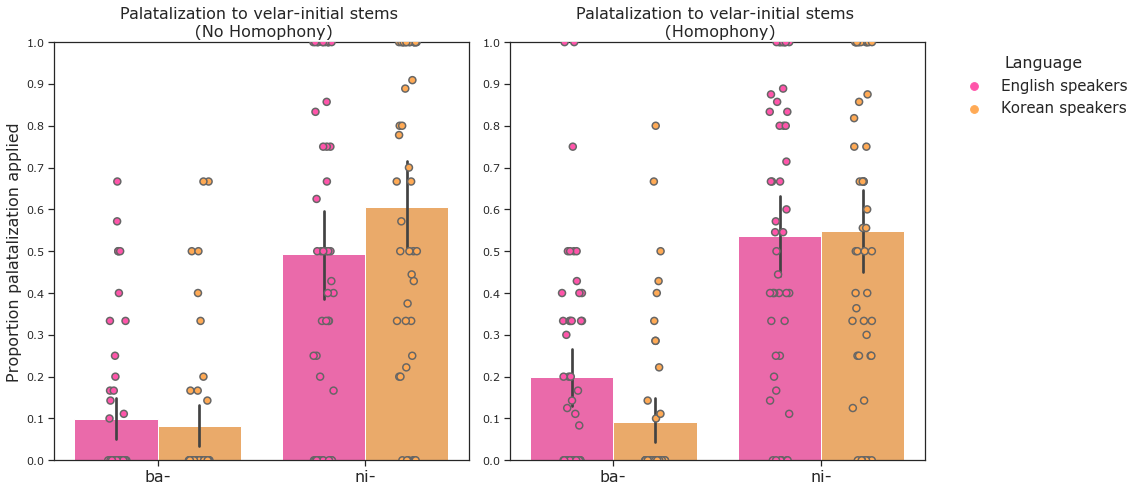

In [205]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(16,7))

# Set figure data

# ax1 - No Homophony 

sns.stripplot(x='AffixUsed', y='AppliedPalatalization', hue='Language',
            data=HomophonyEK[HomophonyEK.Homophony== 0], 
            order=AffixUsed_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.barplot(x='AffixUsed', y='AppliedPalatalization', hue='Language',
            data=HomophonyEK[HomophonyEK.Homophony== 0], 
            order=AffixUsed_order,
            palette=pal_palette, 
            ax=ax1)


# ax2 Homophony

sns.stripplot(x='AffixUsed', y='AppliedPalatalization', hue='Language',
            data=HomophonyEK[HomophonyEK.Homophony== 1], 
            order=AffixUsed_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.barplot(x='AffixUsed', y='AppliedPalatalization', hue='Language',
            data=HomophonyEK[HomophonyEK.Homophony== 1], 
            order=AffixUsed_order,
            palette=pal_palette, 
            #whis=np.inf, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Palatalization to velar-initial stems \n (No Homophony)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(AffixUsed_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Palatalization to velar-initial stems \n (Homophony)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(AffixUsed_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax2.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['English speakers','Korean speakers'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Language', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


In [206]:
### Set additional plotting parameters

# General
prefixfreq_order = ['freqba', 'freqni']
prefixfreq_xticks = ['Frequent\nba-', 'Frequent\nni-']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'Paired'


# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

In [207]:
# Function to adjust spacing of boxplots
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [208]:
'''
ValueError: 'colorblind2' is not a valid value for name; supported values are 
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

'''

"\nValueError: 'colorblind2' is not a valid value for name; supported values are \n'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm',

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


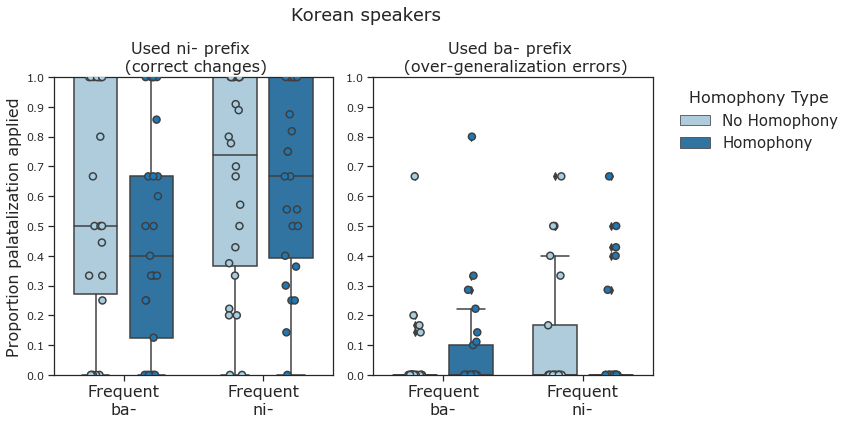

In [209]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
fig.subplots_adjust(top=1.5)
fig.suptitle('Korean speakers', x=0.43, fontsize=18)

# Set figure data

# ax1 - used ni- (correct changes)




sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyK[HomophonyK.AffixUsed=='ni'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyK[HomophonyK.AffixUsed=='ni'], 
            order=prefixfreq_order,
            palette=pal_palette,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyK[HomophonyK.AffixUsed=='ba'], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyK[HomophonyK.AffixUsed=='ba'], 
            order=prefixfreq_order,
            palette=pal_palette, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['No Homophony','Homophony'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Homophony Type', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


In [210]:
### Set additional plotting parameters

# General
prefixfreq_order = ['freqba', 'freqni']
prefixfreq_xticks = ['Frequent\nba-', 'Frequent\nni-']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'YlGn'


# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


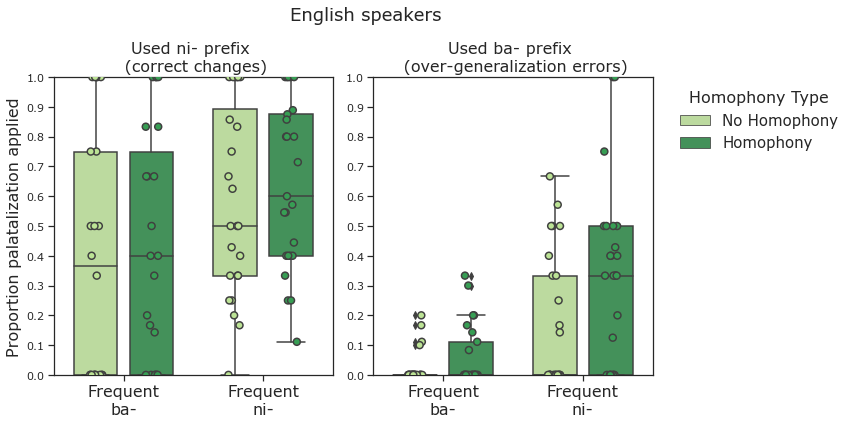

In [211]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
fig.subplots_adjust(top=1.5)
fig.suptitle('English speakers', x=0.43, fontsize=18)

# Set figure data

# ax1 - used ni- (correct changes)




sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[(HomophonyEK.AffixUsed=='ni') & (HomophonyEK.Language == 'Eng')], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[(HomophonyEK.AffixUsed=='ni') & (HomophonyEK.Language == 'Eng')], 
            order=prefixfreq_order,
            palette=pal_palette,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
sns.stripplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[(HomophonyEK.AffixUsed=='ba') & (HomophonyEK.Language == 'Eng')], 
            order=prefixfreq_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.boxplot(x='PrefixFreq', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[(HomophonyEK.AffixUsed=='ba') & (HomophonyEK.Language == 'Eng')], 
            order=prefixfreq_order,
            palette=pal_palette, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(prefixfreq_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['No Homophony','Homophony'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Homophony Type', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


In [212]:
### Set additional plotting parameters

# General
Language_order = ['Eng', 'Kor']
language_xticks = ['English', 'Korean']
titlesize = 16
xtick_fontsize = 16
ylabsize = 16

# Palette
pal_palette = 'RdPu'
#'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'RdBu', 'RdBu_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1',
# For swarm plots
point_lw = 1.5
point_size = 7

sns.set_style( {'font.family':'Verdana'})

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


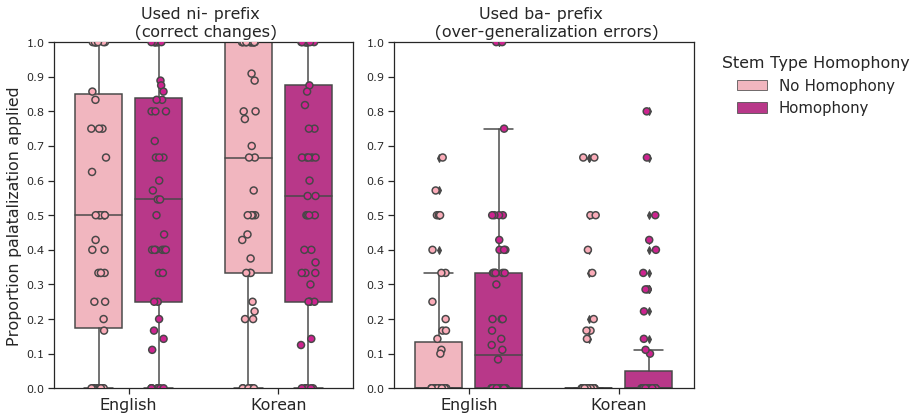

In [213]:
## Dot Plots with a box plot overlapped for %of prefix use


# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,6))
fig.subplots_adjust(top=1.5)
#fig.suptitle('Korean speakers', x=0.43, fontsize=18)

# Set figure data

# ax1 - used ni- (correct changes)



sns.stripplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ni'], 
            order=Language_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)

sns.boxplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ni'],
            order=Language_order,
            palette=pal_palette,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
sns.stripplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ba'], 
            order=Language_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)

sns.boxplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ba'], 
            order=Language_order,
            palette=pal_palette, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(language_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(language_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['No Homophony','Homophony'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Stem Type Homophony', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()


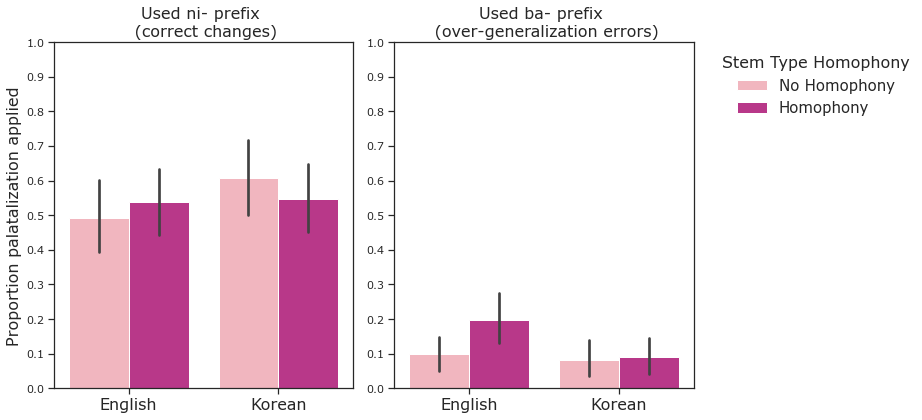

In [214]:

# Initialise figure subplots
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(13,6))
fig.subplots_adjust(top=1.5)
#fig.suptitle('Korean speakers', x=0.43, fontsize=18)

# Set figure data

# ax1 - used ni- (correct changes)


'''
sns.stripplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ni'], 
            order=Language_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax1)
'''
sns.barplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ni'],
            order=Language_order,
            palette=pal_palette,
            ax=ax1)

# ax2 0 used ba- (overgeneralization errors)
'''
sns.stripplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ba'], 
            order=Language_order,
            linewidth=point_lw, size=point_size,
            palette=pal_palette, dodge=True,
            ax=ax2)
'''
sns.barplot(x='Language', y='AppliedPalatalization', hue='Homophony',
            data=HomophonyEK[HomophonyEK.AffixUsed=='ba'], 
            order=Language_order,
            palette=pal_palette, 
            ax=ax2)

# Set figure parameters

ax1.set_title('Used ni- prefix \n (correct changes)', fontsize=titlesize)
ax1.set_xlabel('')
ax1.set_ylabel('Proportion palatalization applied', fontsize=ylabsize)
ax1.set_xticklabels(language_xticks, fontsize=xtick_fontsize)
ax1.set_ylim([0,1])
ax1.get_legend().remove()
ax1.yaxis.set_major_locator(ticker.LinearLocator(11))


ax2.set_title('Used ba- prefix \n (over-generalization errors)',fontsize=titlesize)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(language_xticks, fontsize=xtick_fontsize)
ax2.set_ylim([0,1])      
ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

adjust_box_widths(fig, 0.8)

# Legend

handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles=handles[0:2], labels=['No Homophony','Homophony'], 
               bbox_to_anchor=(1.05, 1), fontsize=15, 
               title='Stem Type Homophony', title_fontsize=16,
               frameon=False, loc=2)

# Make the spacing nice
plt.tight_layout()

## Homophony within Korean 

In [215]:
%%R
# Make subset: only velar-initial stems, excluding no alternation groups,or 50-50
HomophonyK = subset(dataK,dataK$AltType!='no_alt'& dataK$AltType!='non_neut'& dataK$VelarStem==1 & dataK$PrefixFreq!='5050'& dataK$AltType=='neut')

#Make separate subsets of paldata for ba and ni used
ba_HomophonyK = subset(HomophonyK,HomophonyK$AffixUsed=='ba')
ni_HomophonyK = subset(HomophonyK,HomophonyK$AffixUsed=='ni')

In [216]:
%%R
with(HomophonyK, tapply(AppliedPalatalization, list(Homophony, Language,AffixUsed,PrefixFreq,AltType), mean, na.r=T))

, , ba, 5050, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ni, 5050, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ba, freqba, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ni, freqba, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ba, freqni, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ni, freqni, non_neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ba, 5050, neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ni, 5050, neut

  Eng Kor
0  NA  NA
1  NA  NA

, , ba, freqba, neut

  Eng        Kor
0  NA 0.02487562
1  NA 0.06989247

, , ni, freqba, neut

  Eng       Kor
0  NA 0.5394737
1  NA 0.5172414

, , ba, freqni, neut

  Eng        Kor
0  NA 0.09638554
1  NA 0.12345679

, , ni, freqni, neut

  Eng       Kor
0  NA 0.6369048
1  NA 0.6451613



In [217]:
%%R
# Set baseline to 50-50 No alternation grouop 
ni_HomophonyK$Homophony = factor(ni_HomophonyK$Homophony)
ni_HomophonyK$Homophony = relevel(ni_HomophonyK$Homophony, '0')

ba_HomophonyK$Homophony = factor(ba_HomophonyK$Homophony)
ba_HomophonyK$Homophony = relevel(ba_HomophonyK$Homophony, '0')

### ba+palatalization Homophony Korean

In [218]:
%%R
# '0' in Homophony is the velar-initial stems that do not trigger homophony creation
# '1' in Homophony is the velar-initial stems that trigger homophony creation
ba_Homophony_full = glmer(AppliedPalatalization ~ Homophony*PrefixFreq +(1|Stem), 
                    data=ba_HomophonyK, family=binomial)
summary(ba_Homophony_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * PrefixFreq + (1 | Stem)
   Data: ba_HomophonyK

     AIC      BIC   logLik deviance df.resid 
   264.1    285.7   -127.1    254.1      546 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.3938 -0.3166 -0.2601 -0.1623  6.1617 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0.02985  0.1728  
Number of obs: 551, groups:  Stem, 4

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -3.6879     0.4730  -7.798 6.31e-15 ***
Homophony1                    1.0879     0.5643   1.928   0.0539 .  
PrefixFreqfreqni              1.4357     0.5862   2.449   0.0143 *  
Homophony1:PrefixFreqfreqni  -0.7972     0.7353  -1.084   0.2783    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
 

In [219]:
%%R
#Removing interaction effect of Homophony*PrefixFreq
#N.S report anova Homophony * Frequent ni-
ba_Homophony_2 = glmer(AppliedPalatalization ~ Homophony+PrefixFreq +(1|Stem), 
                    data=ba_HomophonyK, family=binomial)
anova(ba_Homophony_full,ba_Homophony_2)

Data: ba_HomophonyK
Models:
ba_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
ba_Homophony_full: AppliedPalatalization ~ Homophony * PrefixFreq + (1 | Stem)
                  Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
ba_Homophony_2     4 263.32 280.56 -127.66   255.32                        
ba_Homophony_full  5 264.12 285.68 -127.06   254.12 1.196      1     0.2741


In [220]:
%%R
#Removing Homophony ns.
#Final model
#Report Homophony ns
ba_Homophony_3 = glmer(AppliedPalatalization ~ PrefixFreq +(1|Stem), 
                    data=ba_HomophonyK, family=binomial)
anova(ba_Homophony_2,ba_Homophony_3)

Data: ba_HomophonyK
Models:
ba_Homophony_3: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
ba_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_Homophony_3  3 263.61 276.55 -128.81   257.61                         
ba_Homophony_2  4 263.32 280.56 -127.66   255.32 2.2966      1     0.1297


In [221]:
%%R
#Removing Rrefix Freq sig
ba_Homophony_4 = glmer(AppliedPalatalization ~ Homophony +(1|Stem), 
                    data=ba_HomophonyK, family=binomial)
anova(ba_Homophony_2,ba_Homophony_4)

Data: ba_HomophonyK
Models:
ba_Homophony_4: AppliedPalatalization ~ Homophony + (1 | Stem)
ba_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
ba_Homophony_4  3 268.27 281.21 -131.14   262.27                            
ba_Homophony_2  4 263.32 280.56 -127.66   255.32 6.9534      1   0.008366 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [222]:
%%R
#Removing Rrefix Freq sig
ba_Homophony_5 = glmer(AppliedPalatalization ~ +(1|Stem), 
                    data=ba_HomophonyK, family=binomial)
anova(ba_Homophony_3,ba_Homophony_5)

Data: ba_HomophonyK
Models:
ba_Homophony_5: AppliedPalatalization ~ +(1 | Stem)
ba_Homophony_3: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
ba_Homophony_5  2 268.77 277.40 -132.39   264.77                            
ba_Homophony_3  3 263.61 276.55 -128.81   257.61 7.1579      1   0.007463 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [223]:
%%R
summary(ba_Homophony_3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
   Data: ba_HomophonyK

     AIC      BIC   logLik deviance df.resid 
   263.6    276.5   -128.8    257.6      548 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.4313 -0.2975 -0.2102 -0.2078  4.8120 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0.1395   0.3735  
Number of obs: 551, groups:  Stem, 4

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -3.0803     0.3125  -9.857  < 2e-16 ***
PrefixFreqfreqni   0.9477     0.3477   2.725  0.00642 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqn -0.545


### Ni+palatalization Homophony Korean

In [224]:
%%R

ni_Homophony_full = glmer(AppliedPalatalization ~ Homophony*PrefixFreq +(1|Stem), 
                    data=ni_HomophonyK, family=binomial)
summary(ni_Homophony_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * PrefixFreq + (1 | Stem)
   Data: ni_HomophonyK

     AIC      BIC   logLik deviance df.resid 
   697.3    718.5   -343.7    687.3      512 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3723 -1.1112  0.7287  0.7824  0.9777 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0.01125  0.1061  
Number of obs: 517, groups:  Stem, 4

Fixed effects:
                            Estimate Std. Error z value Pr(>|z|)
(Intercept)                  0.13999    0.24630   0.568    0.570
Homophony1                  -0.06877    0.33595  -0.205    0.838
PrefixFreqfreqni             0.42212    0.28460   1.483    0.138
Homophony1:PrefixFreqfreqni  0.10828    0.38779   0.279    0.780

Correlation of Fixed Effects:
            (Intr) Hmphn1 PrfxFr
Homophony1  -0.735              
PrfxFrqfrqn -0.786  0.

In [225]:
%%R
#Remove interaction of Homophony*PrefixFreq n.s.
#report anova Homophony * Frequent ni-
ni_Homophony_2 = glmer(AppliedPalatalization ~ Homophony+PrefixFreq +(1|Stem), 
                    data=ni_HomophonyK, family=binomial)
anova(ni_Homophony_full, ni_Homophony_2)

Data: ni_HomophonyK
Models:
ni_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
ni_Homophony_full: AppliedPalatalization ~ Homophony * PrefixFreq + (1 | Stem)
                  Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
ni_Homophony_2     4 695.38 712.38 -343.69   687.38                        
ni_Homophony_full  5 697.31 718.55 -343.65   687.31 0.078      1     0.7801


In [226]:
%%R
#Removing Homophony n.s.
#report anova Homophony n.s.
##Final Model
ni_Homophony_3 = glmer(AppliedPalatalization ~ PrefixFreq +(1|Stem), 
                    data=ni_HomophonyK, family=binomial)
anova(ni_Homophony_2, ni_Homophony_3)

Data: ni_HomophonyK
Models:
ni_Homophony_3: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
ni_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
ni_Homophony_3  3 693.38 706.13 -343.69   687.38                        
ni_Homophony_2  4 695.38 712.38 -343.69   687.38 4e-04      1     0.9845


In [227]:
%%R
#Removing PrefixFreq sig.
ni_Homophony_4 = glmer(AppliedPalatalization ~ Homophony +(1|Stem), 
                    data=ni_HomophonyK, family=binomial)
anova(ni_Homophony_2, ni_Homophony_4)

Data: ni_HomophonyK
Models:
ni_Homophony_4: AppliedPalatalization ~ Homophony + (1 | Stem)
ni_Homophony_2: AppliedPalatalization ~ Homophony + PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
ni_Homophony_4  3 699.53 712.27 -346.76   693.53                           
ni_Homophony_2  4 695.38 712.38 -343.69   687.38 6.1462      1    0.01317 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [228]:
%%R
## Report sig of Frequent ni-
ni_Homophony_5 = glmer(AppliedPalatalization ~ +(1|Stem), 
                    data=ni_HomophonyK, family=binomial)
anova(ni_Homophony_3, ni_Homophony_5)

Data: ni_HomophonyK
Models:
ni_Homophony_5: AppliedPalatalization ~ +(1 | Stem)
ni_Homophony_3: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
               Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
ni_Homophony_5  2 697.53 706.03 -346.77   693.53                           
ni_Homophony_3  3 693.38 706.13 -343.69   687.38 6.1465      1    0.01317 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [229]:
%%R
summary(ni_Homophony_3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Stem)
   Data: ni_HomophonyK

     AIC      BIC   logLik deviance df.resid 
   693.4    706.1   -343.7    687.4      514 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3898 -1.0931  0.7196  0.7764  0.9872 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0.01213  0.1102  
Number of obs: 517, groups:  Stem, 4

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)  
(Intercept)        0.1026     0.1675   0.613   0.5401  
PrefixFreqfreqni   0.4803     0.1937   2.479   0.0132 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqn -0.773


## Compare Homophony between English and Korean

In [230]:
%%R
# Make subset: only velar-initial stems, excluding no alternation groups,or 50-50
HomophonyEK = subset(dataEK,dataEK$AltType!='no_alt' & dataEK$AltType!='non_neut' & dataEK$VelarStem==1 & dataEK$PrefixFreq!='5050'& dataEK$AltType=='neut')

#Make separate subsets of paldata for ba and ni used
ba_HomophonyEK = subset(HomophonyEK,HomophonyEK$AffixUsed=='ba')
ni_HomophonyEK = subset(HomophonyEK,HomophonyEK$AffixUsed=='ni')

In [231]:
%%R
with(HomophonyEK, tapply(AppliedPalatalization, list(Homophony, AffixUsed,Language), mean, na.r=T))

, , Eng

          ba        ni
0 0.07692308 0.5368421
1 0.14981273 0.5795053

, , Kor

          ba        ni
0 0.04577465 0.6065574
1 0.08614232 0.6043956



In [232]:
%%R
# Set baseline to 50-50 No alternation grouop 
ni_HomophonyEK$Homophony = factor(ni_HomophonyEK$Homophony)
ni_HomophonyEK$Homophony = relevel(ni_HomophonyEK$Homophony, '0')

ba_HomophonyEK$Homophony = factor(ba_HomophonyEK$Homophony)
ba_HomophonyEK$Homophony = relevel(ba_HomophonyEK$Homophony, '0')

In [233]:
%%R
#Interception: Frequent ni- No Homophony English
Ni_HomophonyEK_full = glmer(AppliedPalatalization ~ Homophony*Language*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
summary(Ni_HomophonyEK_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * Language * PrefixFreq + (1 |  
    Subject) + (1 | Stem)
   Data: ni_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
  1188.9   1237.9   -584.4   1168.9      980 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7639 -0.7051  0.3080  0.6438  2.1801 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.83748  1.356   
 Stem    (Intercept) 0.08065  0.284   
Number of obs: 990, groups:  Subject, 99; Stem, 4

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)                              0.43801    0.39907   1.098   0.2724  
Homophony1                               0.32929    0.39571   0.832   0.4053  
LanguageKor                              0.42016    0.48614   0.864   0.3874  
PrefixFreqfreqba                        

In [234]:
%%R
#Removing the three-way interaction effect n.s. report
Ni_HomophonyEK_2 = glmer(AppliedPalatalization ~ Homophony*Language+Homophony*PrefixFreq+Language*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_full,Ni_HomophonyEK_2)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
Ni_HomophonyEK_2:     Language * PrefixFreq + (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_full: AppliedPalatalization ~ Homophony * Language * PrefixFreq + (1 | 
Ni_HomophonyEK_full:     Subject) + (1 | Stem)
                    Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_2     9 1187.0 1231.1 -584.50   1169.0                         
Ni_HomophonyEK_full 10 1188.9 1237.9 -584.44   1168.9 0.1151      1     0.7345


In [235]:
%%R
#Removing Homophony*Language
Ni_HomophonyEK_3 = glmer(AppliedPalatalization ~ Homophony*PrefixFreq+Language*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_2,Ni_HomophonyEK_3)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_3: AppliedPalatalization ~ Homophony * PrefixFreq + Language * PrefixFreq + 
Ni_HomophonyEK_3:     (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
Ni_HomophonyEK_2:     Language * PrefixFreq + (1 | Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_3  8 1186.2 1225.3 -585.08   1170.2                         
Ni_HomophonyEK_2  9 1187.0 1231.1 -584.50   1169.0 1.1548      1     0.2825


In [236]:
%%R
#Removing  Homophony*PrefixFreq
#Report anova Homophony*Frequent ba- n.s.
#the next subset model starts from this
Ni_HomophonyEK_5 = glmer(AppliedPalatalization ~ Homophony*Language+Language*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_Homophony_2,Ni_HomophonyEK_5)


Error in anova(Ni_Homophony_2, Ni_HomophonyEK_5) : 
  object 'Ni_Homophony_2' not found


/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in anova(Ni_Homophony_2, Ni_HomophonyEK_5) : 
  object 'Ni_Homophony_2' not found

  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: There were 30 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)


In [237]:
%%R
#Removing  Language*Prefix
Ni_HomophonyEK_6 = glmer(AppliedPalatalization ~ Homophony*Language+Homophony*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_2,Ni_HomophonyEK_6)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_6: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
Ni_HomophonyEK_6:     (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
Ni_HomophonyEK_2:     Language * PrefixFreq + (1 | Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_6  8 1185.1 1224.3 -584.56   1169.1                         
Ni_HomophonyEK_2  9 1187.0 1231.1 -584.50   1169.0 0.1169      1     0.7324


In [238]:
%%R
#Removing  Homophony*Language
Ni_HomophonyEK_7 = glmer(AppliedPalatalization ~ Homophony+Language*PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_5,Ni_HomophonyEK_7)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_7: AppliedPalatalization ~ Homophony + Language * PrefixFreq + (1 | 
Ni_HomophonyEK_7:     Subject) + (1 | Stem)
Ni_HomophonyEK_5: AppliedPalatalization ~ Homophony * Language + Language * PrefixFreq + 
Ni_HomophonyEK_5:     (1 | Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_7  7 1184.2 1218.5 -585.10   1170.2                         
Ni_HomophonyEK_5  8 1185.0 1224.2 -584.52   1169.0 1.1629      1     0.2809


In [239]:
%%R
#Removing  Language*PrefixFreq
#report anova Korean Frequent ba n.s.
#the next subset model starts from here
Ni_HomophonyEK_8 = glmer(AppliedPalatalization ~ PrefixFreq+Homophony*Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_5,Ni_HomophonyEK_8)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_8: AppliedPalatalization ~ PrefixFreq + Homophony * Language + (1 | 
Ni_HomophonyEK_8:     Subject) + (1 | Stem)
Ni_HomophonyEK_5: AppliedPalatalization ~ Homophony * Language + Language * PrefixFreq + 
Ni_HomophonyEK_5:     (1 | Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_8  7 1183.2 1217.4 -584.58   1169.2                         
Ni_HomophonyEK_5  8 1185.0 1224.2 -584.52   1169.0 0.1217      1     0.7272


In [240]:
%%R
#Removing  Homophony*Language
#report homophony * Korean n.s.
Ni_HomophonyEK_9 = glmer(AppliedPalatalization ~ PrefixFreq+Homophony+Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_8,Ni_HomophonyEK_9)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_9: AppliedPalatalization ~ PrefixFreq + Homophony + Language + (1 | 
Ni_HomophonyEK_9:     Subject) + (1 | Stem)
Ni_HomophonyEK_8: AppliedPalatalization ~ PrefixFreq + Homophony * Language + (1 | 
Ni_HomophonyEK_8:     Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_9  6 1182.3 1211.7 -585.16   1170.3                         
Ni_HomophonyEK_8  7 1183.2 1217.4 -584.58   1169.2 1.1532      1     0.2829


In [241]:
%%R
#Removing  Language
Ni_HomophonyEK_10 = glmer(AppliedPalatalization ~ PrefixFreq+Homophony+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_9,Ni_HomophonyEK_10)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_10: AppliedPalatalization ~ PrefixFreq + Homophony + (1 | Subject) + 
Ni_HomophonyEK_10:     (1 | Stem)
Ni_HomophonyEK_9: AppliedPalatalization ~ PrefixFreq + Homophony + Language + (1 | 
Ni_HomophonyEK_9:     Subject) + (1 | Stem)
                  Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_10  5 1181.6 1206.1 -585.80   1171.6                         
Ni_HomophonyEK_9   6 1182.3 1211.7 -585.16   1170.3 1.2807      1     0.2578


In [242]:
%%R
#Removing  Homophony
#report anova Homophony n.s.
Ni_HomophonyEK_11 = glmer(AppliedPalatalization ~ PrefixFreq+Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_9,Ni_HomophonyEK_11)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_11: AppliedPalatalization ~ PrefixFreq + Language + (1 | Subject) + 
Ni_HomophonyEK_11:     (1 | Stem)
Ni_HomophonyEK_9: AppliedPalatalization ~ PrefixFreq + Homophony + Language + (1 | 
Ni_HomophonyEK_9:     Subject) + (1 | Stem)
                  Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_11  5 1180.6 1205.1 -585.29   1170.6                         
Ni_HomophonyEK_9   6 1182.3 1211.7 -585.16   1170.3 0.2593      1     0.6106


In [243]:
%%R
#Removing  Prefix
Ni_HomophonyEK_12 = glmer(AppliedPalatalization ~ Homophony+Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_9,Ni_HomophonyEK_12)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_12: AppliedPalatalization ~ Homophony + Language + (1 | Subject) + 
Ni_HomophonyEK_12:     (1 | Stem)
Ni_HomophonyEK_9: AppliedPalatalization ~ PrefixFreq + Homophony + Language + (1 | 
Ni_HomophonyEK_9:     Subject) + (1 | Stem)
                  Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
Ni_HomophonyEK_12  5 1188.2 1212.7 -589.12   1178.2                            
Ni_HomophonyEK_9   6 1182.3 1211.7 -585.16   1170.3 7.9344      1    0.00485 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [244]:
%%R
#Removing  Language
#Report anova Korean
##Final model
Ni_HomophonyEK_13 = glmer(AppliedPalatalization ~ PrefixFreq+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_11,Ni_HomophonyEK_13)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_13: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_11: AppliedPalatalization ~ PrefixFreq + Language + (1 | Subject) + 
Ni_HomophonyEK_11:     (1 | Stem)
                  Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_13  4 1179.8 1199.4 -585.92   1171.8                         
Ni_HomophonyEK_11  5 1180.6 1205.1 -585.29   1170.6 1.2625      1     0.2612


In [245]:
%%R
#Removing  PrefixFreq
#report anova Frequent ba sig
Ni_HomophonyEK_14 = glmer(AppliedPalatalization ~ +(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_13,Ni_HomophonyEK_14)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_14: AppliedPalatalization ~ +(1 | Subject) + (1 | Stem)
Ni_HomophonyEK_13: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
                  Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
Ni_HomophonyEK_14  3 1185.6 1200.3 -589.80   1179.6                            
Ni_HomophonyEK_13  4 1179.8 1199.4 -585.92   1171.8 7.7569      1   0.005351 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [246]:
%%R
summary(Ni_HomophonyEK_13)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ PrefixFreq + (1 | Subject) + (1 | Stem)
   Data: ni_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
  1179.8   1199.4   -585.9   1171.8      986 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6642 -0.7116  0.3168  0.6468  2.2500 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 1.84960  1.3600  
 Stem    (Intercept) 0.08849  0.2975  
Number of obs: 990, groups:  Subject, 99; Stem, 4

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)        0.7517     0.2654   2.832  0.00463 **
PrefixFreqfreqba  -0.9219     0.3277  -2.814  0.00490 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
PrfxFrqfrqb -0.557


In [247]:
%%R
ba_HomophonyEK$PrefixFreq = factor(ba_HomophonyEK$PrefixFreq )
ba_HomophonyEK$PrefixFreq  = relevel(ba_HomophonyEK$PrefixFreq , 'freqni')

In [248]:
%%R

ba_HomophonyEK_full = glmer(AppliedPalatalization ~ Homophony*Language*PrefixFreq +(1|Stem),
                    data=ba_HomophonyEK,family=binomial, REML=FALSE)

summary(ba_HomophonyEK_full)
#lmer_ba_12 = glmer(AppliedPalatalization ~ PrefixFreq+ (1|Subject)+(1|Stem), 
                    #data=ba_dataEK, family=binomial,control=glmerControl(optimizer="bobyqa",optCtrl=list(2e5)))
#anova(lmer_ba_11,lmer_ba_12)

/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: boundary (singular) fit: see ?isSingular

  warnings.warn(x, RRuntimeWarning)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * Language * PrefixFreq + (1 |  
    Stem)
   Data: ba_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
   611.1    656.3   -296.5    593.1     1121 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7192 -0.3266 -0.2433 -0.1597  6.2610 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0        0       
Number of obs: 1130, groups:  Stem, 4

Fixed effects:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             -1.58816    0.25178  -6.308 2.83e-10
Homophony1                               0.92891    0.33759   2.752  0.00593
LanguageKor                             -0.64989    0.44918  -1.447  0.14794
PrefixFreqfreqba                        -2.07540    0.51826  -4.005 6.21e-05
Homophony1:LanguageKor                  

In [249]:
%%R
ba_HomophonyEK_2 = glmer(AppliedPalatalization ~ Homophony*Language+Homophony*PrefixFreq+Language*PrefixFreq +(1|Stem), 
                    data=ba_HomophonyEK, family=binomial, REML=FALSE)

anova(ba_HomophonyEK_full,ba_HomophonyEK_2)


Data: ba_HomophonyEK
Models:
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
ba_HomophonyEK_2:     Language * PrefixFreq + (1 | Stem)
ba_HomophonyEK_full: AppliedPalatalization ~ Homophony * Language * PrefixFreq + (1 | 
ba_HomophonyEK_full:     Stem)
                    Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_HomophonyEK_2     8 609.88 650.12 -296.94   593.88                         
ba_HomophonyEK_full  9 611.05 656.32 -296.53   593.05 0.8275      1      0.363


In [250]:
%%R
#Remove Homophony*Language
ba_HomophonyEK_3 = glmer(AppliedPalatalization ~ Homophony*PrefixFreq+Language*PrefixFreq +(1|Stem), 
                    data=ba_HomophonyEK, family=binomial, REML=FALSE)

anova(ba_HomophonyEK_2,ba_HomophonyEK_3)


Data: ba_HomophonyEK
Models:
ba_HomophonyEK_3: AppliedPalatalization ~ Homophony * PrefixFreq + Language * PrefixFreq + 
ba_HomophonyEK_3:     (1 | Stem)
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
ba_HomophonyEK_2:     Language * PrefixFreq + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_HomophonyEK_3  7 608.30 643.51 -297.15   594.30                         
ba_HomophonyEK_2  8 609.88 650.12 -296.94   593.88 0.4163      1     0.5188


In [251]:
%%R
#remove Homophony*PrefixFreq
#report anova Hom*PrefixFreq n.s.
ba_HomophonyEK_4 = glmer(AppliedPalatalization ~ Homophony*Language+Language*PrefixFreq +(1|Stem), 
                    data=ba_HomophonyEK, family=binomial, REML=FALSE)
anova(ba_HomophonyEK_2,ba_HomophonyEK_4)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_4: AppliedPalatalization ~ Homophony * Language + Language * PrefixFreq + 
ba_HomophonyEK_4:     (1 | Stem)
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
ba_HomophonyEK_2:     Language * PrefixFreq + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_HomophonyEK_4  7 608.29 643.50 -297.14   594.29                         
ba_HomophonyEK_2  8 609.88 650.12 -296.94   593.88 0.4078      1     0.5231


In [252]:
%%R
#remove Language*PrefixFreq

ba_HomophonyEK_5 = glmer(AppliedPalatalization ~ Homophony*Language+Homophony*PrefixFreq +(1|Stem), 
                    data=ba_HomophonyEK, family=binomial, REML=FALSE)
anova(ba_HomophonyEK_2,ba_HomophonyEK_5)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_5: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
ba_HomophonyEK_5:     (1 | Stem)
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony * Language + Homophony * PrefixFreq + 
ba_HomophonyEK_2:     Language * PrefixFreq + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
ba_HomophonyEK_5  7 614.69 649.90 -300.34   600.69                            
ba_HomophonyEK_2  8 609.88 650.12 -296.94   593.88 6.8042      1   0.009094 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [253]:
%%R
#remove Homophony*Language
#report anova Homophony *Kor n.s.
#Final model
ba_HomophonyEK_6 = glmer(AppliedPalatalization ~ Homophony+Language*PrefixFreq +(1|Stem), 
                data=ba_HomophonyEK, family=binomial, REML=FALSE)
anova(ba_HomophonyEK_4,ba_HomophonyEK_6)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_6: AppliedPalatalization ~ Homophony + Language * PrefixFreq + (1 | 
ba_HomophonyEK_6:     Stem)
ba_HomophonyEK_4: AppliedPalatalization ~ Homophony * Language + Language * PrefixFreq + 
ba_HomophonyEK_4:     (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_HomophonyEK_6  6 606.54 636.72 -297.27   594.54                         
ba_HomophonyEK_4  7 608.29 643.50 -297.14   594.29 0.2493      1     0.6176


In [254]:
%%R
#remove Homophony*PrefixFreq
ba_HomophonyEK_7 = glmer(AppliedPalatalization ~ PrefixFreq+Homophony*Language+(1|Stem), 
                    data=ba_HomophonyEK, family=binomial, REML=FALSE)
anova(ba_HomophonyEK_4,ba_HomophonyEK_7)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_7: AppliedPalatalization ~ PrefixFreq + Homophony * Language + (1 | 
ba_HomophonyEK_7:     Stem)
ba_HomophonyEK_4: AppliedPalatalization ~ Homophony * Language + Language * PrefixFreq + 
ba_HomophonyEK_4:     (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
ba_HomophonyEK_7  6 613.05 643.23 -300.52   601.05                            
ba_HomophonyEK_4  7 608.29 643.50 -297.14   594.29 6.7589      1   0.009328 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [255]:
%%R
#remove Language*PrefixFreq

ba_HomophonyEK_8 = glmer(AppliedPalatalization ~ Homophony+Language+PrefixFreq +(1|Stem), 
                data=ba_HomophonyEK, family=binomial, REML=FALSE)
anova(ba_HomophonyEK_6,ba_HomophonyEK_8)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_8: AppliedPalatalization ~ Homophony + Language + PrefixFreq + (1 | 
ba_HomophonyEK_8:     Stem)
ba_HomophonyEK_6: AppliedPalatalization ~ Homophony + Language * PrefixFreq + (1 | 
ba_HomophonyEK_6:     Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
ba_HomophonyEK_8  5 611.18 636.33 -300.59   601.18                            
ba_HomophonyEK_6  6 606.54 636.72 -297.27   594.54 6.6449      1   0.009944 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [256]:
%%R 
summary(ba_HomophonyEK_6)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony + Language * PrefixFreq + (1 |  
    Stem)
   Data: ba_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
   606.5    636.7   -297.3    594.5     1124 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7010 -0.2780 -0.2424 -0.1612  6.2017 

Random effects:
 Groups Name        Variance Std.Dev.
 Stem   (Intercept) 0        0       
Number of obs: 1130, groups:  Stem, 4

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -1.5257     0.2071  -7.367 1.75e-13 ***
Homophony1                     0.8151     0.2261   3.605 0.000313 ***
LanguageKor                   -1.0343     0.3030  -3.413 0.000641 ***
PrefixFreqfreqba              -2.1240     0.3136  -6.773 1.26e-11 ***
LanguageKor:PrefixFreqfreqba   1.1975     0.4693   2.552 0.010720 *  
---
S

In [257]:
%%R
summary(ba_Homophony2)


Error in summary(ba_Homophony2) : object 'ba_Homophony2' not found


/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in summary(ba_Homophony2) : object 'ba_Homophony2' not found

  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 1: extra argument(s) ‘REML’ disregarded 

  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 2: extra argument(s) ‘REML’ disregarded 

  warnings.warn(x, RRuntimeWarning)
/Users/HanByulSong/opt/anaconda3/envs/rpy/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 3: extra argument(s) ‘REML’ disregarded 

  warnings.warn(x, RRuntimeWarning)
/Users/

##  Homophony without interaction of Prefix Frequency
### English and Korean

In [258]:
%%R
# Set baseline to 50-50 No alternation grouop 
ni_HomophonyEK$Homophony = factor(ni_HomophonyEK$Homophony)
ni_HomophonyEK$Homophony = relevel(ni_HomophonyEK$Homophony, '0')
ni_HomophonyEK$Language = factor(ni_HomophonyEK$Language)
ni_HomophonyEK$Language = relevel(ni_HomophonyEK$Language, 'Eng')

ba_HomophonyEK$Homophony = factor(ba_HomophonyEK$Homophony)
ba_HomophonyEK$Homophony = relevel(ba_HomophonyEK$Homophony, '0')
ba_HomophonyEK$Language = factor(ba_HomophonyEK$Language)
ba_HomophonyEK$Language = relevel(ba_HomophonyEK$Language, 'Eng')

In [259]:
%%R
#Interception: Frequent ni- No Homophony English
Ni_HomophonyEK_full = glmer(AppliedPalatalization ~ Homophony*Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
summary(Ni_HomophonyEK_full)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * Language + (1 | Subject) +  
    (1 | Stem)
   Data: ni_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
  1189.1   1218.5   -588.5   1177.1      984 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7142 -0.7138  0.3157  0.6396  2.2554 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.02431  1.4228  
 Stem    (Intercept) 0.07769  0.2787  
Number of obs: 990, groups:  Subject, 99; Stem, 4

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)
(Intercept)            -0.02665    0.33675  -0.079    0.937
Homophony1              0.33958    0.35911   0.946    0.344
LanguageKor             0.54966    0.38108   1.442    0.149
Homophony1:LanguageKor -0.34316    0.31558  -1.087    0.277

Correlation of Fixed Effects:
            (Intr) Hmphn1 LnggKr
Homop

In [260]:
%%R
#Interception: Frequent ni- No Homophony English
#interaction n.s. report
Ni_HomophonyEK_2 = glmer(AppliedPalatalization ~ Homophony+Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_full,Ni_HomophonyEK_2)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject) + 
Ni_HomophonyEK_2:     (1 | Stem)
Ni_HomophonyEK_full: AppliedPalatalization ~ Homophony * Language + (1 | Subject) + 
Ni_HomophonyEK_full:     (1 | Stem)
                    Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_2     5 1188.2 1212.7 -589.12   1178.2                         
Ni_HomophonyEK_full  6 1189.1 1218.5 -588.55   1177.1 1.1509      1     0.2834


In [261]:
%%R
#Interception: Frequent ni- No Homophony English
Ni_HomophonyEK_3 = glmer(AppliedPalatalization ~ Homophony+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_2,Ni_HomophonyEK_3)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_3: AppliedPalatalization ~ Homophony + (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject) + 
Ni_HomophonyEK_2:     (1 | Stem)
                 Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_3  4 1187.3 1206.9 -589.68   1179.3                        
Ni_HomophonyEK_2  5 1188.2 1212.7 -589.12   1178.2 1.106      1      0.293


In [262]:
%%R
#Interception: Frequent ni- No Homophony English
#Homophony n.s. report
Ni_HomophonyEK_4 = glmer(AppliedPalatalization ~ Language+(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_2,Ni_HomophonyEK_4)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_4: AppliedPalatalization ~ Language + (1 | Subject) + (1 | Stem)
Ni_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject) + 
Ni_HomophonyEK_2:     (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_4  4 1186.5 1206.1 -589.25   1178.5                         
Ni_HomophonyEK_2  5 1188.2 1212.7 -589.12   1178.2 0.2545      1     0.6139


In [263]:
%%R
#Interception: Frequent ni- No Homophony English
#language n.s. report
#final model
Ni_HomophonyEK_5 = glmer(AppliedPalatalization ~ +(1|Subject) +(1|Stem), 
                    data=ni_HomophonyEK, family=binomial)
anova(Ni_HomophonyEK_4,Ni_HomophonyEK_5)

Data: ni_HomophonyEK
Models:
Ni_HomophonyEK_5: AppliedPalatalization ~ +(1 | Subject) + (1 | Stem)
Ni_HomophonyEK_4: AppliedPalatalization ~ Language + (1 | Subject) + (1 | Stem)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Ni_HomophonyEK_5  3 1185.6 1200.3 -589.80   1179.6                         
Ni_HomophonyEK_4  4 1186.5 1206.1 -589.25   1178.5 1.0898      1     0.2965


In [264]:
%%R
summary(Ni_HomophonyEK_5)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ +(1 | Subject) + (1 | Stem)
   Data: ni_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
  1185.6   1200.3   -589.8   1179.6      987 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5452 -0.7145  0.3202  0.6454  2.3583 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.03578  1.4268  
 Stem    (Intercept) 0.08389  0.2896  
Number of obs: 990, groups:  Subject, 99; Stem, 4

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.3404     0.2221   1.533    0.125


In [265]:
%%R

ba_HomophonyEK_full = glmer(AppliedPalatalization ~ Homophony*Language +(1|Subject),
                    data=ba_HomophonyEK,family=binomial, REML=FALSE)

summary(ba_HomophonyEK_full)


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony * Language + (1 | Subject)
   Data: ba_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
   596.7    621.8   -293.3    586.7     1125 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3148 -0.2470 -0.1459 -0.1098  5.8740 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.988    1.729   
Number of obs: 1130, groups:  Subject, 99

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -3.2454     0.3952  -8.212  < 2e-16 ***
Homophony1               1.0186     0.3192   3.191  0.00142 ** 
LanguageKor             -0.7668     0.5692  -1.347  0.17793    
Homophony1:LanguageKor  -0.4252     0.5113  -0.832  0.40563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr

In [266]:
%%R
#final model
ba_HomophonyEK_2 = glmer(AppliedPalatalization ~ Homophony+Language +(1|Subject),
                    data=ba_HomophonyEK,family=binomial, REML=FALSE)
anova(ba_HomophonyEK_full,ba_HomophonyEK_2)


Data: ba_HomophonyEK
Models:
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject)
ba_HomophonyEK_full: AppliedPalatalization ~ Homophony * Language + (1 | Subject)
                    Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
ba_HomophonyEK_2     4 595.37 615.49 -293.69   587.37                         
ba_HomophonyEK_full  5 596.68 621.83 -293.34   586.68 0.6881      1     0.4068


In [245]:
%%R
#Language(Kor) sig report
ba_HomophonyEK_3 = glmer(AppliedPalatalization ~ Homophony +(1|Subject),
                    data=ba_HomophonyEK,family=binomial, REML=FALSE)


anova(ba_HomophonyEK_2,ba_HomophonyEK_3)


Data: ba_HomophonyEK
Models:
ba_HomophonyEK_3: AppliedPalatalization ~ Homophony + (1 | Subject)
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject)
                 Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
ba_HomophonyEK_3  3 598.14 613.23 -296.07   592.14                           
ba_HomophonyEK_2  4 595.37 615.49 -293.69   587.37 4.7656      1    0.02903 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [268]:
%%R
# Homophony sig report
ba_HomophonyEK_4 = glmer(AppliedPalatalization ~ Language+(1|Subject),
                    data=ba_HomophonyEK,family=binomial, REML=FALSE)


anova(ba_HomophonyEK_2,ba_HomophonyEK_4)

Data: ba_HomophonyEK
Models:
ba_HomophonyEK_4: AppliedPalatalization ~ Language + (1 | Subject)
ba_HomophonyEK_2: AppliedPalatalization ~ Homophony + Language + (1 | Subject)
                 Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)    
ba_HomophonyEK_4  3 605.73 620.82 -299.87   599.73                            
ba_HomophonyEK_2  4 595.37 615.49 -293.69   587.37 12.36      1  0.0004386 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [248]:
%%R
summary(ba_HomophonyEK_2 )

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: AppliedPalatalization ~ Homophony + Language + (1 | Subject)
   Data: ba_HomophonyEK

     AIC      BIC   logLik deviance df.resid 
   595.4    615.5   -293.7    587.4     1126 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2595 -0.2434 -0.1554 -0.1068  5.5477 

Random effects:
 Groups  Name        Variance Std.Dev.
 Subject (Intercept) 2.933    1.713   
Number of obs: 1130, groups:  Subject, 99

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.1429     0.3686  -8.527  < 2e-16 ***
Homophony1    0.8568     0.2492   3.438 0.000586 ***
LanguageKor  -1.0219     0.4809  -2.125 0.033585 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) Hmphn1
Homophony1  -0.418       
LanguageKor -0.430 -0.059


### Over-Generalization cases (Palatalization to non-velar-initial stems)

In [197]:
key_presses = pd.DataFrame(df[(df.VelarStem==0) & (df.AltType!='no_alt')].groupby('Group').KeyPress.value_counts())
key_presses.columns = ['Count']
key_presses.reset_index(inplace=True)
key_table = pd.pivot_table(key_presses, index=['Group'], columns=['KeyPress'], values=['Count'])
key_table.columns = key_table.columns.droplevel(0)
key_table.drop(['u'], axis=1, inplace=True)
key_table.fillna(0, inplace=True)
key_table['pal_of_nonvelars_with_ni'] = key_table.apply(lambda x: x['m'] / (x['m']+x['j']), axis=1)
key_table['pal_of_nonvelars_with_ba'] = key_table.apply(lambda x: x['v'] / (x['v']+x['f']), axis=1)
key_table

KeyPress,f,j,m,v,pal_of_nonvelars_with_ni,pal_of_nonvelars_with_ba
Group,,,,,,
5050_neut,385.0,431.0,5.0,1.0,0.011468,0.002591
5050_nonneut,393.0,358.0,1.0,0.0,0.002786,0.000000
K_freqba_neut,548.0,290.0,0.0,0.0,0.000000,0.000000
K_freqba_nonneut,484.0,305.0,0.0,0.0,0.000000,0.000000
K_freqni_neut,236.0,581.0,0.0,1.0,0.000000,0.004219
K_freqni_nonneut,245.0,528.0,1.0,0.0,0.001890,0.000000
freqba_neut,535.0,293.0,0.0,0.0,0.000000,0.000000
freqba_nonneut,619.0,192.0,1.0,0.0,0.005181,0.000000
freqni_neut,241.0,559.0,1.0,2.0,0.001786,0.008230
